In [1]:
# Importing the required modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import pickle
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,6)

In [3]:
# Importing the dataset
df = pd.read_csv('Cleaned_Soil.csv')

In [4]:
# Obtaining data specific to Anantapur

In [5]:
df = df[df['District'] == 'West Godavari']
df.head()

,Unnamed: 0,Latitude,Longitude,District,Mandal,Village,SoilType,pH,EC,OC,...,B,Fe,Cu,Mn,NDVI,ARVI,EVI,GCI,NDWI,Crop
4235,4238,16.61,81.38,West Godavari,Akividu,Akividu,Black Clay,7.66,3.71,0.67,...,3.14,53.18,15.10,12.62,0.024055,0.018218,0.142907,0.073182,-0.035299,Paddy
4236,4239,16.61,81.37,West Godavari,Akividu,Akividu,Black Clay,7.54,2.44,0.55,...,3.79,78.44,9.98,17.40,0.023388,0.017978,0.145289,0.072260,-0.034870,Paddy
4237,4240,16.61,81.37,West Godavari,Akividu,Akividu,Black Clay,7.37,3.55,0.82,...,3.61,87.14,16.42,29.72,0.023388,0.017978,0.145289,0.072260,-0.034870,Paddy
4238,4241,16.61,81.37,West Godavari,Akividu,Akividu,Black Clay,7.21,1.77,0.70,...,2.79,100.70,14.76,26.42,0.023388,0.017978,0.145289,0.072260,-0.034870,Paddy
4239,4242,16.61,81.37,West Godavari,Akividu,Akividu,Black Clay,7.66,2.85,0.67,...,4.74,68.50,14.62,24.04,0.023388,0.017978,0.145289,0.072260,-0.034870,Paddy


In [6]:
# Dropping unnecessary columns
df = df.drop(['Unnamed: 0', 'Latitude', 'Longitude', 'District', 'Mandal', 'Village', 'ARVI', 'EVI', 'NDVI', 'NDWI'], axis = 1)
df.describe()

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,GCI
count,313.000000,313.000000,313.00000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000
mean,7.047061,1.219904,0.52770,29.210224,159.092652,1400.006390,518.782748,199.571661,1.465879,2.032524,69.261086,7.465208,18.538818,0.201738
std,0.851788,1.209212,0.28375,25.089836,96.045634,822.900136,400.421594,226.740241,1.860245,1.508240,60.967097,6.403115,11.707530,0.193601
min,4.450000,0.010000,0.03000,1.180000,16.000000,86.000000,5.000000,0.810000,0.050000,0.130000,0.070000,0.070000,0.040000,0.065720
25%,6.520000,0.110000,0.26000,11.110000,74.000000,595.000000,111.000000,6.180000,0.580000,0.560000,21.980000,1.130000,10.480000,0.072968
50%,7.240000,1.050000,0.50000,21.340000,133.000000,1410.000000,517.000000,159.000000,0.980000,1.950000,52.560000,6.320000,16.240000,0.080563
75%,7.650000,2.100000,0.76000,40.580000,233.000000,2216.000000,930.000000,342.750000,1.580000,3.210000,99.430000,14.180000,23.470000,0.337445
max,8.700000,5.860000,1.21000,152.440000,611.000000,3969.000000,1171.000000,1505.090000,18.600000,6.440000,314.900000,20.180000,86.660000,1.087560


In [7]:
# Analysis of SoilType

In [8]:
df.SoilType.unique()

array(['Black Clay', 'Black Clay ', 'Clay', 'Black', 'Light Broiwn',
       'Red Sandy', 'Red Sandy Loam', 'Brown', 'Red', 'Sandy',
       'Clay Sandy', 'Black ', 'Brown Clay', 'Brown Light', 'Brown ',
       'Light Brown', 'Sandy Loam', 'Broan Clay', 'Red  Sandy',
       'Brown Dark', 'Red Sandy '], dtype=object)

In [9]:
df['SoilType'] = df['SoilType'].replace(['Black Clay', 'Black Clay '], 'Black Clay Soil')
df['SoilType'] = df['SoilType'].replace(['Clay'], 'Clay Soil')
df['SoilType'] = df['SoilType'].replace(['Black ', 'Black'], 'Black Soil')
df['SoilType'] = df['SoilType'].replace(['Light Broiwn ', 'Brown Light', 'Light Brown', 'Light Broiwn'], 'Light Brown Soil')
df['SoilType'] = df['SoilType'].replace(['Brown', 'Brown ', 'Brown Dark'], 'Brown Soil')
df['SoilType'] = df['SoilType'].replace(['Brown Clay', 'Broan Clay'], 'Brown Clay Soil')
df['SoilType'] = df['SoilType'].replace(['Red Sandy', 'Red  Sandy', 'Red Sandy '], 'Red Sandy Soil')
df['SoilType'] = df['SoilType'].replace('Red Sandy Loam', 'Red Sandy Loam Soil')
df['SoilType'] = df['SoilType'].replace('Clay Sandy', 'Sandy Clay Soil')
df['SoilType'] = df['SoilType'].replace('Sandy', 'Sandy Soil')
df['SoilType'] = df['SoilType'].replace('Red', 'Red Soil')
df['SoilType'] = df['SoilType'].replace('Sandy Loam', 'Sandy Loam Soil')
df.SoilType.unique()

array(['Black Clay Soil', 'Clay Soil', 'Black Soil', 'Light Brown Soil',
       'Red Sandy Soil', 'Red Sandy Loam Soil', 'Brown Soil', 'Red Soil',
       'Sandy Soil', 'Sandy Clay Soil', 'Brown Clay Soil',
       'Sandy Loam Soil'], dtype=object)

In [10]:
soilCount = dict(df['SoilType'].value_counts())
soilCount

{'Black Clay Soil': 173,
 'Black Soil': 37,
 'Brown Soil': 33,
 'Light Brown Soil': 30,
 'Red Soil': 12,
 'Red Sandy Soil': 7,
 'Brown Clay Soil': 5,
 'Red Sandy Loam Soil': 5,
 'Clay Soil': 5,
 'Sandy Loam Soil': 4,
 'Sandy Soil': 1,
 'Sandy Clay Soil': 1}

<BarContainer object of 12 artists>

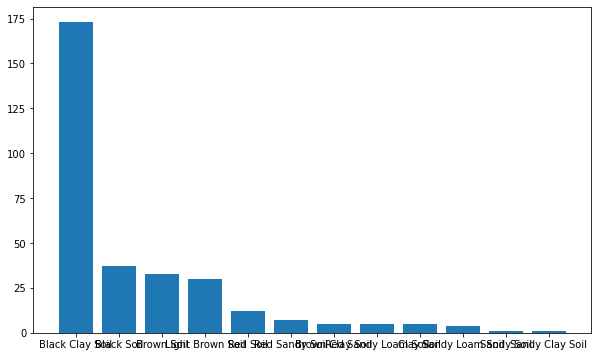

In [11]:
soilType = soilCount.keys()
soilCounts = soilCount.values()
plt.bar(soilType, soilCounts)

In [12]:
# Analysis of Crops grown 

In [13]:
df.Crop.unique()

array(['Paddy ', 'Paddy', 'Maize', 'Groundnut', 'Cashew', 'Oil Palm',
       'Coconut+ Banana', 'Coconut', 'Lime', 'Cocoa+ Coconut',
       'Sugar Cane', 'Mulberry', 'Coconut+Cocoa', 'Cocnut+Banana',
       'Oil Palm+Coconut', 'Mulberrry', 'Coconut+ Cocoa', 'Cane+Lime ',
       'Cocnut+Lime', 'Oil Palm ', 'Tobacco', 'Cane', 'Eucalyptus',
       'Mango', 'Red Sandal', 'Oil Palm+Banana', 'Sandal', 'Cashew+Maize',
       'Banana', 'Brinjal'], dtype=object)

In [14]:
df['Crop'].value_counts()

Paddy               138
Paddy                47
Maize                44
Oil Palm             37
Lime                  9
Cashew                7
Coconut               5
Cane                  3
Eucalyptus            2
Cocnut+Banana         1
Cane+Lime             1
Groundnut             1
Cocnut+Lime           1
Brinjal               1
Oil Palm+Coconut      1
Cocoa+ Coconut        1
Coconut+ Banana       1
Oil Palm              1
Coconut+ Cocoa        1
Mulberrry             1
Coconut+Cocoa         1
Cashew+Maize          1
Red Sandal            1
Sandal                1
Mango                 1
Banana                1
Oil Palm+Banana       1
Mulberry              1
Tobacco               1
Sugar Cane            1
Name: Crop, dtype: int64

Paddy                         185
OilPalm + Coconut + Banana     52
Maize                          52
SugarCane                      14
Name: Crop, dtype: int64


<BarContainer object of 4 artists>

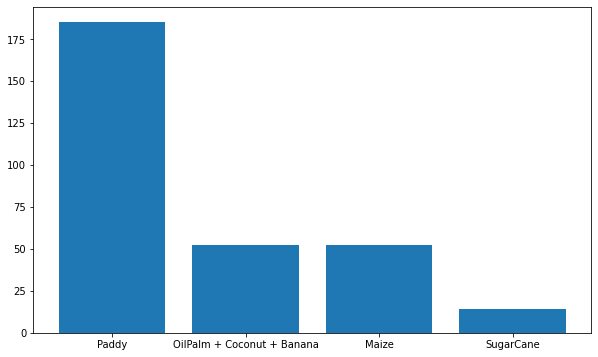

In [15]:
df['Crop'] = df['Crop'].replace(['Paddy ', 'Paddy'], 'Paddy')
df['Crop'] = df['Crop'].replace('Paady', 'Paddy')
df['Crop'] = df['Crop'].replace('Oil Palm', 'OilPalm')
df['Crop'] = df['Crop'].replace(['Coconut', 'Coconut+ Banana', 'Cocoa+ Coconut', 'Coconut+Cocoa', 'Cocnut+Banana', 'Coconut+ Cocoa', 'Cocnut+Lime'], 'Coconut')
df['Crop'] = df['Crop'].replace(['OilPalm', 'Coconut', 'Oil Palm+Coconut', 'Oil Palm ', 'Oil Palm+Banana', 'Banana'], 'OilPalm + Coconut + Banana')
df['Crop'] = df['Crop'].replace(['Cashew', 'Cashew+Maize'], 'Maize')
df['Crop'] = df['Crop'].replace(['Cane+Lime ', 'Lime', 'Cane', 'Sugar Cane'], 'SugarCane')
df = df[(df['Crop'] != 'Groundnut') & (df['Crop'] != 'Brinjal') & (df['Crop'] != 'Sandal') & (df['Crop'] != 'Red Sandal') & (df['Crop'] != 'Mango') & (df['Crop'] != 'Eucalyptus') & (df['Crop'] != 'Tobacco') & (df['Crop'] != 'Mulberrry') & (df['Crop'] != 'Mulberry')]

print(df['Crop'].value_counts())
cropCount = dict(df['Crop'].value_counts())
cropType = cropCount.keys()
cropCounts = cropCount.values()
plt.bar(cropType, cropCounts)

In [16]:
# Getting rid of features that have a high correlation among one another

In [17]:
cor_matrix = df.corr()
cor_matrix

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,GCI
pH,1.000000,0.265128,-0.007376,0.071154,0.335927,0.330180,0.311368,0.195464,-0.041114,0.325979,-0.184313,0.097448,-0.326562,0.107487
EC,0.265128,1.000000,0.618774,0.531399,0.609634,0.658226,0.773301,0.896447,0.309252,0.843697,0.440366,0.685738,0.032399,0.381461
OC,-0.007376,0.618774,1.000000,0.692562,0.466257,0.619471,0.649804,0.618853,0.517313,0.609047,0.805941,0.809661,0.335071,0.384665
P,0.071154,0.531399,0.692562,1.000000,0.508427,0.381387,0.427702,0.576944,0.414544,0.499417,0.642009,0.584928,0.186620,0.227223
K,0.335927,0.609634,0.466257,0.508427,1.000000,0.577818,0.644379,0.634508,0.180731,0.694782,0.316391,0.596825,0.067216,0.357748
Ca,0.330180,0.658226,0.619471,0.381387,0.577818,1.000000,0.912366,0.650816,0.121050,0.731598,0.381731,0.822074,0.084419,0.538536
Mg,0.311368,0.773301,0.649804,0.427702,0.644379,0.912366,1.000000,0.705222,0.141034,0.853073,0.423422,0.889638,0.079142,0.586363
S,0.195464,0.896447,0.618853,0.576944,0.634508,0.650816,0.705222,1.000000,0.314794,0.795320,0.491456,0.664093,0.102953,0.364706
Zn,-0.041114,0.309252,0.517313,0.414544,0.180731,0.121050,0.141034,0.314794,1.000000,0.228145,0.496443,0.263753,0.128532,-0.012783
B,0.325979,0.843697,0.609047,0.499417,0.694782,0.731598,0.853073,0.795320,0.228145,1.000000,0.454374,0.744184,0.045943,0.462413


In [18]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
print('Columns to be dropped : ', to_drop)

Columns to be dropped :  ['OC', 'P', 'K', 'Ca', 'Mg', 'S', 'Zn', 'B', 'Fe', 'Cu', 'GCI']


In [19]:
df = df.drop(to_drop, axis = 1)
print('Columns taken into consideration : ', list(df.columns))

Columns taken into consideration :  ['SoilType', 'pH', 'EC', 'Mn', 'Crop']


In [20]:
# Separating the dependent and independent variables
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [21]:
# Encoding SoilType as it is a categorical variable
X = pd.get_dummies(X, prefix='', prefix_sep='')
print(X.head(1))
print(y.head(1))
X = X.values
y = y.values

        pH    EC     Mn  Black Clay Soil  Black Soil  Brown Clay Soil  \
4235  7.66  3.71  12.62                1           0                0   

      Brown Soil  Clay Soil  Light Brown Soil  Red Sandy Loam Soil  \
4235           0          0                 0                    0   

      Red Sandy Soil  Red Soil  Sandy Clay Soil  Sandy Loam Soil  Sandy Soil  
4235               0         0                0                0           0  
4235    Paddy
Name: Crop, dtype: object


In [22]:
# Standardizing the independent variables using Feature Scaling
sc1 = StandardScaler()
X[:, 0:4] = sc1.fit_transform(X[:, 0:4])

In [23]:
# Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

# K-Nearest Neighbors Classifier

In [24]:
clf1 = KNeighborsClassifier(weights='distance')
clf1.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [25]:
y_test_pred = clf1.predict(X_test)
y_train_pred = clf1.predict(X_train)
AC1_train = accuracy_score(y_train, y_train_pred)
AC1_test = accuracy_score(y_test, y_test_pred)

In [26]:
print('Training Accuracy: ', AC1_train)
print('Testing Accuracy: ', AC1_test)

Training Accuracy:  1.0
Testing Accuracy:  0.8157894736842105


In [27]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf1, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 81.54 %
Standard Deviation: 5.01 %


# Decision Tree Classifier

In [28]:
clf2 = DecisionTreeClassifier(random_state=0)
clf2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [29]:
y_test_pred = clf2.predict(X_test)
y_train_pred = clf2.predict(X_train)
AC2_train = accuracy_score(y_train, y_train_pred)
AC2_test = accuracy_score(y_test, y_test_pred)

In [30]:
print('Training Accuracy: ', AC2_train)
print('Testing Accuracy: ', AC2_test)

Training Accuracy:  1.0
Testing Accuracy:  0.8026315789473685


In [31]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf2, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 81.07 %
Standard Deviation: 7.60 %


# Random Forest Classifier

In [32]:
clf3 = RandomForestClassifier(random_state=0)
clf3.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [33]:
y_test_pred = clf3.predict(X_test)
y_train_pred = clf3.predict(X_train)
AC3_train = accuracy_score(y_train, y_train_pred)
AC3_test = accuracy_score(y_test, y_test_pred)

In [34]:
print('Training Accuracy: ', AC3_train)
print('Testing Accuracy: ', AC3_test)

Training Accuracy:  1.0
Testing Accuracy:  0.8289473684210527


In [35]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf3, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 84.13 %
Standard Deviation: 7.11 %


In [36]:
pickle.dump(clf3, open('WG_model.pkl', 'wb'))
pickle.dump(sc1, open('WG_scaler.pkl', 'wb'))

# XGBoost

In [37]:
clf4 = HistGradientBoostingClassifier(random_state=0)
clf4.fit(X_train, y_train)

HistGradientBoostingClassifier(random_state=0)

In [38]:
y_test_pred = clf4.predict(X_test)
y_train_pred = clf4.predict(X_train)
AC4_train = accuracy_score(y_train, y_train_pred)
AC4_test = accuracy_score(y_test, y_test_pred)

In [39]:
print('Training Accuracy: ', AC4_train)
print('Testing Accuracy: ', AC4_test)

Training Accuracy:  1.0
Testing Accuracy:  0.7763157894736842


In [40]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf4, X = X_train, y = y_train, cv = 10)

In [41]:
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 81.98 %
Standard Deviation: 5.20 %


# Multi-layer Perceptron Classifier

In [42]:
clf5 = MLPClassifier(random_state=0, learning_rate= 'adaptive')
clf5.fit(X_train, y_train)

MLPClassifier(learning_rate='adaptive', random_state=0)

In [43]:
y_test_pred = clf5.predict(X_test)
y_train_pred = clf5.predict(X_train)
AC5_train = accuracy_score(y_train, y_train_pred)
AC5_test = accuracy_score(y_test, y_test_pred)

In [44]:
print('Training Accuracy: ', AC5_train)
print('Testing Accuracy: ', AC5_test)

Training Accuracy:  0.8986784140969163
Testing Accuracy:  0.7894736842105263


In [45]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf5, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 86.78 %
Standard Deviation: 5.87 %


In [46]:
# pickle.dump(clf5, open('WG_model.pkl', 'wb'))
# pickle.dump(sc1, open('WG_scaler.pkl', 'wb'))

# Catboost

In [47]:
from catboost import CatBoostClassifier, Pool, cv

model = CatBoostClassifier(iterations=100, depth=2, learning_rate=1, loss_function='MultiClass', verbose=True)
model.fit(X_train, y_train)

model.calc_feature_statistics(X_train, y_train, feature=1, plot=True)

train_data = Pool(data=X_train, label=y_train)
model.get_feature_importance(train_data)

#Cross-Validation
cv_dataset = Pool(data=X_train, label=y_train)
params = {"iterations": 100, "depth": 2, "loss_function": "MultiClass", "verbose": False}
scores = cv(cv_dataset, params, fold_count=5, plot="True")

model = CatBoostClassifier(loss_function='MultiClass')
grid = {'learning_rate': [0.03, 0.1], 'depth': [4, 6, 10]}
grid_search_result = model.grid_search(grid, X=X_train, y=y_train, cv=3, plot=True)

model.score(X_test, y_test)

# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

0:	learn: 0.5642402	total: 146ms	remaining: 14.5s
1:	learn: 0.4748144	total: 149ms	remaining: 7.28s
2:	learn: 0.4149018	total: 150ms	remaining: 4.86s
3:	learn: 0.4078797	total: 152ms	remaining: 3.65s
4:	learn: 0.3966994	total: 154ms	remaining: 2.92s
5:	learn: 0.3536222	total: 155ms	remaining: 2.44s
6:	learn: 0.3343769	total: 157ms	remaining: 2.09s
7:	learn: 0.3323360	total: 159ms	remaining: 1.83s
8:	learn: 0.3222810	total: 161ms	remaining: 1.63s
9:	learn: 0.3108441	total: 163ms	remaining: 1.46s
10:	learn: 0.3011107	total: 165ms	remaining: 1.33s
11:	learn: 0.2930370	total: 166ms	remaining: 1.22s
12:	learn: 0.2831532	total: 168ms	remaining: 1.12s
13:	learn: 0.2812729	total: 170ms	remaining: 1.04s
14:	learn: 0.2765490	total: 172ms	remaining: 973ms
15:	learn: 0.2634654	total: 173ms	remaining: 910ms
16:	learn: 0.2602696	total: 175ms	remaining: 855ms
17:	learn: 0.2564392	total: 176ms	remaining: 803ms
18:	learn: 0.2531635	total: 178ms	remaining: 757ms
19:	learn: 0.2475110	total: 179ms	remaini

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.5164756698
bestIteration = 99

Training on fold [1/5]

bestTest = 0.4445836707
bestIteration = 99

Training on fold [2/5]

bestTest = 0.5317352543
bestIteration = 99

Training on fold [3/5]

bestTest = 0.4853893297
bestIteration = 99

Training on fold [4/5]

bestTest = 0.4131492387
bestIteration = 99



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.3383548	test: 1.3379482	best: 1.3379482 (0)	total: 968us	remaining: 968ms
1:	learn: 1.3008182	test: 1.3019537	best: 1.3019537 (1)	total: 1.95ms	remaining: 971ms
2:	learn: 1.2610844	test: 1.2614155	best: 1.2614155 (2)	total: 2.82ms	remaining: 938ms
3:	learn: 1.2237878	test: 1.2220611	best: 1.2220611 (3)	total: 3.47ms	remaining: 865ms
4:	learn: 1.1877383	test: 1.1849552	best: 1.1849552 (4)	total: 4.39ms	remaining: 874ms
5:	learn: 1.1572575	test: 1.1542404	best: 1.1542404 (5)	total: 5.25ms	remaining: 870ms
6:	learn: 1.1259922	test: 1.1206323	best: 1.1206323 (6)	total: 5.71ms	remaining: 810ms
7:	learn: 1.0983492	test: 1.0932453	best: 1.0932453 (7)	total: 6.6ms	remaining: 818ms
8:	learn: 1.0693809	test: 1.0625976	best: 1.0625976 (8)	total: 7.5ms	remaining: 826ms
9:	learn: 1.0402858	test: 1.0339170	best: 1.0339170 (9)	total: 8.42ms	remaining: 834ms
10:	learn: 1.0179353	test: 1.0127783	best: 1.0127783 (10)	total: 9.39ms	remaining: 845ms
11:	learn: 0.9964582	test: 0.9913036	best: 0

162:	learn: 0.3493177	test: 0.3757898	best: 0.3757898 (162)	total: 162ms	remaining: 831ms
163:	learn: 0.3484168	test: 0.3756736	best: 0.3756736 (163)	total: 163ms	remaining: 831ms
164:	learn: 0.3473391	test: 0.3749695	best: 0.3749695 (164)	total: 164ms	remaining: 830ms
165:	learn: 0.3459749	test: 0.3733529	best: 0.3733529 (165)	total: 165ms	remaining: 830ms
166:	learn: 0.3447939	test: 0.3729866	best: 0.3729866 (166)	total: 166ms	remaining: 829ms
167:	learn: 0.3441629	test: 0.3727376	best: 0.3727376 (167)	total: 167ms	remaining: 828ms
168:	learn: 0.3433533	test: 0.3723221	best: 0.3723221 (168)	total: 168ms	remaining: 827ms
169:	learn: 0.3426185	test: 0.3720898	best: 0.3720898 (169)	total: 169ms	remaining: 826ms
170:	learn: 0.3414034	test: 0.3709074	best: 0.3709074 (170)	total: 170ms	remaining: 825ms
171:	learn: 0.3404190	test: 0.3699739	best: 0.3699739 (171)	total: 171ms	remaining: 824ms
172:	learn: 0.3394110	test: 0.3698936	best: 0.3698936 (172)	total: 172ms	remaining: 823ms
173:	learn

334:	learn: 0.2422577	test: 0.3522070	best: 0.3505336 (312)	total: 334ms	remaining: 662ms
335:	learn: 0.2418379	test: 0.3522960	best: 0.3505336 (312)	total: 335ms	remaining: 662ms
336:	learn: 0.2416091	test: 0.3521489	best: 0.3505336 (312)	total: 336ms	remaining: 661ms
337:	learn: 0.2406214	test: 0.3522110	best: 0.3505336 (312)	total: 337ms	remaining: 660ms
338:	learn: 0.2402768	test: 0.3522851	best: 0.3505336 (312)	total: 338ms	remaining: 659ms
339:	learn: 0.2399132	test: 0.3524365	best: 0.3505336 (312)	total: 339ms	remaining: 658ms
340:	learn: 0.2393346	test: 0.3521535	best: 0.3505336 (312)	total: 340ms	remaining: 657ms
341:	learn: 0.2387737	test: 0.3521543	best: 0.3505336 (312)	total: 341ms	remaining: 657ms
342:	learn: 0.2383869	test: 0.3522013	best: 0.3505336 (312)	total: 342ms	remaining: 656ms
343:	learn: 0.2382286	test: 0.3520705	best: 0.3505336 (312)	total: 343ms	remaining: 655ms
344:	learn: 0.2376762	test: 0.3518084	best: 0.3505336 (312)	total: 344ms	remaining: 654ms
345:	learn

500:	learn: 0.1884735	test: 0.3570405	best: 0.3505336 (312)	total: 509ms	remaining: 507ms
501:	learn: 0.1881882	test: 0.3570683	best: 0.3505336 (312)	total: 510ms	remaining: 506ms
502:	learn: 0.1878214	test: 0.3567754	best: 0.3505336 (312)	total: 511ms	remaining: 505ms
503:	learn: 0.1875182	test: 0.3569585	best: 0.3505336 (312)	total: 512ms	remaining: 504ms
504:	learn: 0.1872468	test: 0.3568334	best: 0.3505336 (312)	total: 513ms	remaining: 503ms
505:	learn: 0.1869277	test: 0.3571723	best: 0.3505336 (312)	total: 514ms	remaining: 502ms
506:	learn: 0.1867461	test: 0.3574018	best: 0.3505336 (312)	total: 515ms	remaining: 501ms
507:	learn: 0.1866156	test: 0.3576191	best: 0.3505336 (312)	total: 516ms	remaining: 500ms
508:	learn: 0.1863546	test: 0.3575810	best: 0.3505336 (312)	total: 517ms	remaining: 499ms
509:	learn: 0.1860327	test: 0.3575096	best: 0.3505336 (312)	total: 518ms	remaining: 498ms
510:	learn: 0.1857290	test: 0.3579327	best: 0.3505336 (312)	total: 519ms	remaining: 497ms
511:	learn

656:	learn: 0.1534216	test: 0.3668391	best: 0.3505336 (312)	total: 677ms	remaining: 353ms
657:	learn: 0.1532174	test: 0.3665966	best: 0.3505336 (312)	total: 678ms	remaining: 352ms
658:	learn: 0.1529892	test: 0.3668350	best: 0.3505336 (312)	total: 679ms	remaining: 351ms
659:	learn: 0.1527346	test: 0.3668051	best: 0.3505336 (312)	total: 680ms	remaining: 350ms
660:	learn: 0.1526608	test: 0.3669136	best: 0.3505336 (312)	total: 681ms	remaining: 349ms
661:	learn: 0.1525712	test: 0.3669833	best: 0.3505336 (312)	total: 682ms	remaining: 348ms
662:	learn: 0.1523737	test: 0.3671658	best: 0.3505336 (312)	total: 683ms	remaining: 347ms
663:	learn: 0.1521392	test: 0.3674749	best: 0.3505336 (312)	total: 684ms	remaining: 346ms
664:	learn: 0.1519698	test: 0.3674067	best: 0.3505336 (312)	total: 685ms	remaining: 345ms
665:	learn: 0.1516708	test: 0.3675435	best: 0.3505336 (312)	total: 686ms	remaining: 344ms
666:	learn: 0.1515407	test: 0.3677756	best: 0.3505336 (312)	total: 687ms	remaining: 343ms
667:	learn

815:	learn: 0.1265738	test: 0.3764028	best: 0.3505336 (312)	total: 852ms	remaining: 192ms
816:	learn: 0.1263809	test: 0.3763640	best: 0.3505336 (312)	total: 853ms	remaining: 191ms
817:	learn: 0.1261289	test: 0.3766686	best: 0.3505336 (312)	total: 854ms	remaining: 190ms
818:	learn: 0.1260819	test: 0.3766705	best: 0.3505336 (312)	total: 855ms	remaining: 189ms
819:	learn: 0.1258933	test: 0.3763742	best: 0.3505336 (312)	total: 857ms	remaining: 188ms
820:	learn: 0.1257279	test: 0.3761633	best: 0.3505336 (312)	total: 858ms	remaining: 187ms
821:	learn: 0.1255611	test: 0.3762140	best: 0.3505336 (312)	total: 859ms	remaining: 186ms
822:	learn: 0.1254125	test: 0.3761114	best: 0.3505336 (312)	total: 860ms	remaining: 185ms
823:	learn: 0.1252324	test: 0.3766004	best: 0.3505336 (312)	total: 861ms	remaining: 184ms
824:	learn: 0.1251550	test: 0.3766120	best: 0.3505336 (312)	total: 862ms	remaining: 183ms
825:	learn: 0.1250116	test: 0.3767152	best: 0.3505336 (312)	total: 863ms	remaining: 182ms
826:	learn

973:	learn: 0.1080818	test: 0.3896233	best: 0.3505336 (312)	total: 1.02s	remaining: 27.2ms
974:	learn: 0.1079172	test: 0.3898142	best: 0.3505336 (312)	total: 1.02s	remaining: 26.2ms
975:	learn: 0.1078777	test: 0.3898398	best: 0.3505336 (312)	total: 1.02s	remaining: 25.1ms
976:	learn: 0.1077040	test: 0.3898048	best: 0.3505336 (312)	total: 1.02s	remaining: 24.1ms
977:	learn: 0.1075803	test: 0.3900002	best: 0.3505336 (312)	total: 1.02s	remaining: 23ms
978:	learn: 0.1074970	test: 0.3901207	best: 0.3505336 (312)	total: 1.02s	remaining: 22ms
979:	learn: 0.1073836	test: 0.3902678	best: 0.3505336 (312)	total: 1.03s	remaining: 20.9ms
980:	learn: 0.1072993	test: 0.3902580	best: 0.3505336 (312)	total: 1.03s	remaining: 19.9ms
981:	learn: 0.1072329	test: 0.3903415	best: 0.3505336 (312)	total: 1.03s	remaining: 18.8ms
982:	learn: 0.1071052	test: 0.3902214	best: 0.3505336 (312)	total: 1.03s	remaining: 17.8ms
983:	learn: 0.1069469	test: 0.3903553	best: 0.3505336 (312)	total: 1.03s	remaining: 16.8ms
984

143:	learn: 0.1871553	test: 0.3744568	best: 0.3579899 (61)	total: 143ms	remaining: 852ms
144:	learn: 0.1858333	test: 0.3758577	best: 0.3579899 (61)	total: 144ms	remaining: 851ms
145:	learn: 0.1852696	test: 0.3761614	best: 0.3579899 (61)	total: 145ms	remaining: 850ms
146:	learn: 0.1845996	test: 0.3765243	best: 0.3579899 (61)	total: 146ms	remaining: 849ms
147:	learn: 0.1833016	test: 0.3767145	best: 0.3579899 (61)	total: 147ms	remaining: 848ms
148:	learn: 0.1823162	test: 0.3765827	best: 0.3579899 (61)	total: 148ms	remaining: 847ms
149:	learn: 0.1813247	test: 0.3774497	best: 0.3579899 (61)	total: 149ms	remaining: 846ms
150:	learn: 0.1808075	test: 0.3776130	best: 0.3579899 (61)	total: 150ms	remaining: 845ms
151:	learn: 0.1802938	test: 0.3777837	best: 0.3579899 (61)	total: 151ms	remaining: 844ms
152:	learn: 0.1797645	test: 0.3771357	best: 0.3579899 (61)	total: 152ms	remaining: 843ms
153:	learn: 0.1787408	test: 0.3766204	best: 0.3579899 (61)	total: 153ms	remaining: 842ms
154:	learn: 0.1783474

309:	learn: 0.0997987	test: 0.4105378	best: 0.3579899 (61)	total: 311ms	remaining: 692ms
310:	learn: 0.0994824	test: 0.4109220	best: 0.3579899 (61)	total: 312ms	remaining: 692ms
311:	learn: 0.0993794	test: 0.4109495	best: 0.3579899 (61)	total: 313ms	remaining: 691ms
312:	learn: 0.0989716	test: 0.4117809	best: 0.3579899 (61)	total: 314ms	remaining: 690ms
313:	learn: 0.0987723	test: 0.4121181	best: 0.3579899 (61)	total: 315ms	remaining: 689ms
314:	learn: 0.0986115	test: 0.4123685	best: 0.3579899 (61)	total: 316ms	remaining: 688ms
315:	learn: 0.0982693	test: 0.4133839	best: 0.3579899 (61)	total: 317ms	remaining: 687ms
316:	learn: 0.0977989	test: 0.4140740	best: 0.3579899 (61)	total: 318ms	remaining: 686ms
317:	learn: 0.0974478	test: 0.4140248	best: 0.3579899 (61)	total: 319ms	remaining: 685ms
318:	learn: 0.0972054	test: 0.4140098	best: 0.3579899 (61)	total: 320ms	remaining: 684ms
319:	learn: 0.0969215	test: 0.4146815	best: 0.3579899 (61)	total: 321ms	remaining: 683ms
320:	learn: 0.0965127

482:	learn: 0.0623234	test: 0.4522970	best: 0.3579899 (61)	total: 487ms	remaining: 521ms
483:	learn: 0.0622358	test: 0.4519625	best: 0.3579899 (61)	total: 488ms	remaining: 520ms
484:	learn: 0.0621924	test: 0.4519573	best: 0.3579899 (61)	total: 489ms	remaining: 519ms
485:	learn: 0.0620877	test: 0.4516776	best: 0.3579899 (61)	total: 490ms	remaining: 518ms
486:	learn: 0.0618477	test: 0.4529348	best: 0.3579899 (61)	total: 491ms	remaining: 517ms
487:	learn: 0.0617035	test: 0.4528761	best: 0.3579899 (61)	total: 492ms	remaining: 516ms
488:	learn: 0.0614853	test: 0.4537693	best: 0.3579899 (61)	total: 493ms	remaining: 515ms
489:	learn: 0.0612754	test: 0.4546081	best: 0.3579899 (61)	total: 494ms	remaining: 514ms
490:	learn: 0.0611997	test: 0.4548000	best: 0.3579899 (61)	total: 495ms	remaining: 513ms
491:	learn: 0.0610836	test: 0.4547291	best: 0.3579899 (61)	total: 496ms	remaining: 512ms
492:	learn: 0.0609770	test: 0.4548906	best: 0.3579899 (61)	total: 497ms	remaining: 511ms
493:	learn: 0.0608950

656:	learn: 0.0435964	test: 0.4859541	best: 0.3579899 (61)	total: 657ms	remaining: 343ms
657:	learn: 0.0435131	test: 0.4859202	best: 0.3579899 (61)	total: 658ms	remaining: 342ms
658:	learn: 0.0434519	test: 0.4860475	best: 0.3579899 (61)	total: 659ms	remaining: 341ms
659:	learn: 0.0434192	test: 0.4860940	best: 0.3579899 (61)	total: 660ms	remaining: 340ms
660:	learn: 0.0433605	test: 0.4864129	best: 0.3579899 (61)	total: 661ms	remaining: 339ms
661:	learn: 0.0433050	test: 0.4865481	best: 0.3579899 (61)	total: 662ms	remaining: 338ms
662:	learn: 0.0432656	test: 0.4867477	best: 0.3579899 (61)	total: 663ms	remaining: 337ms
663:	learn: 0.0431265	test: 0.4869374	best: 0.3579899 (61)	total: 664ms	remaining: 336ms
664:	learn: 0.0430804	test: 0.4872737	best: 0.3579899 (61)	total: 665ms	remaining: 335ms
665:	learn: 0.0430055	test: 0.4878466	best: 0.3579899 (61)	total: 666ms	remaining: 334ms
666:	learn: 0.0428985	test: 0.4878422	best: 0.3579899 (61)	total: 667ms	remaining: 333ms
667:	learn: 0.0428458

811:	learn: 0.0337168	test: 0.5083888	best: 0.3579899 (61)	total: 826ms	remaining: 191ms
812:	learn: 0.0336893	test: 0.5085318	best: 0.3579899 (61)	total: 827ms	remaining: 190ms
813:	learn: 0.0336275	test: 0.5092244	best: 0.3579899 (61)	total: 829ms	remaining: 189ms
814:	learn: 0.0335537	test: 0.5092038	best: 0.3579899 (61)	total: 830ms	remaining: 188ms
815:	learn: 0.0334435	test: 0.5099949	best: 0.3579899 (61)	total: 831ms	remaining: 187ms
816:	learn: 0.0334292	test: 0.5100625	best: 0.3579899 (61)	total: 832ms	remaining: 186ms
817:	learn: 0.0333754	test: 0.5100741	best: 0.3579899 (61)	total: 833ms	remaining: 185ms
818:	learn: 0.0333068	test: 0.5096721	best: 0.3579899 (61)	total: 834ms	remaining: 184ms
819:	learn: 0.0332523	test: 0.5097379	best: 0.3579899 (61)	total: 835ms	remaining: 183ms
820:	learn: 0.0332340	test: 0.5098740	best: 0.3579899 (61)	total: 836ms	remaining: 182ms
821:	learn: 0.0331696	test: 0.5106779	best: 0.3579899 (61)	total: 837ms	remaining: 181ms
822:	learn: 0.0331226

976:	learn: 0.0272638	test: 0.5372297	best: 0.3579899 (61)	total: 1s	remaining: 23.6ms
977:	learn: 0.0272353	test: 0.5375641	best: 0.3579899 (61)	total: 1s	remaining: 22.6ms
978:	learn: 0.0272101	test: 0.5376418	best: 0.3579899 (61)	total: 1s	remaining: 21.5ms
979:	learn: 0.0271678	test: 0.5372216	best: 0.3579899 (61)	total: 1s	remaining: 20.5ms
980:	learn: 0.0271278	test: 0.5371631	best: 0.3579899 (61)	total: 1.01s	remaining: 19.5ms
981:	learn: 0.0270763	test: 0.5373581	best: 0.3579899 (61)	total: 1.01s	remaining: 18.5ms
982:	learn: 0.0270549	test: 0.5377731	best: 0.3579899 (61)	total: 1.01s	remaining: 17.4ms
983:	learn: 0.0270350	test: 0.5381186	best: 0.3579899 (61)	total: 1.01s	remaining: 16.4ms
984:	learn: 0.0270113	test: 0.5383799	best: 0.3579899 (61)	total: 1.01s	remaining: 15.4ms
985:	learn: 0.0269729	test: 0.5381406	best: 0.3579899 (61)	total: 1.01s	remaining: 14.4ms
986:	learn: 0.0269566	test: 0.5380900	best: 0.3579899 (61)	total: 1.01s	remaining: 13.3ms
987:	learn: 0.0269381	

118:	learn: 0.3684646	test: 0.4220123	best: 0.4220123 (118)	total: 327ms	remaining: 2.42s
119:	learn: 0.3663145	test: 0.4204674	best: 0.4204674 (119)	total: 330ms	remaining: 2.42s
120:	learn: 0.3648976	test: 0.4191568	best: 0.4191568 (120)	total: 333ms	remaining: 2.42s
121:	learn: 0.3631521	test: 0.4175915	best: 0.4175915 (121)	total: 335ms	remaining: 2.41s
122:	learn: 0.3608030	test: 0.4162758	best: 0.4162758 (122)	total: 338ms	remaining: 2.41s
123:	learn: 0.3595791	test: 0.4154441	best: 0.4154441 (123)	total: 341ms	remaining: 2.41s
124:	learn: 0.3583848	test: 0.4150155	best: 0.4150155 (124)	total: 344ms	remaining: 2.41s
125:	learn: 0.3564877	test: 0.4139160	best: 0.4139160 (125)	total: 347ms	remaining: 2.41s
126:	learn: 0.3551356	test: 0.4127319	best: 0.4127319 (126)	total: 350ms	remaining: 2.4s
127:	learn: 0.3539545	test: 0.4116436	best: 0.4116436 (127)	total: 353ms	remaining: 2.4s
128:	learn: 0.3526823	test: 0.4114272	best: 0.4114272 (128)	total: 355ms	remaining: 2.4s
129:	learn: 0

254:	learn: 0.2309584	test: 0.3691498	best: 0.3691498 (254)	total: 700ms	remaining: 2.04s
255:	learn: 0.2302247	test: 0.3692700	best: 0.3691498 (254)	total: 703ms	remaining: 2.04s
256:	learn: 0.2295856	test: 0.3687729	best: 0.3687729 (256)	total: 706ms	remaining: 2.04s
257:	learn: 0.2289542	test: 0.3691897	best: 0.3687729 (256)	total: 709ms	remaining: 2.04s
258:	learn: 0.2283284	test: 0.3697371	best: 0.3687729 (256)	total: 712ms	remaining: 2.04s
259:	learn: 0.2277795	test: 0.3699455	best: 0.3687729 (256)	total: 714ms	remaining: 2.03s
260:	learn: 0.2270369	test: 0.3701619	best: 0.3687729 (256)	total: 718ms	remaining: 2.03s
261:	learn: 0.2263403	test: 0.3700747	best: 0.3687729 (256)	total: 721ms	remaining: 2.03s
262:	learn: 0.2254948	test: 0.3703826	best: 0.3687729 (256)	total: 724ms	remaining: 2.03s
263:	learn: 0.2250280	test: 0.3702828	best: 0.3687729 (256)	total: 726ms	remaining: 2.02s
264:	learn: 0.2244359	test: 0.3704082	best: 0.3687729 (256)	total: 729ms	remaining: 2.02s
265:	learn

387:	learn: 0.1610170	test: 0.3667507	best: 0.3645654 (346)	total: 1.07s	remaining: 1.69s
388:	learn: 0.1604775	test: 0.3665571	best: 0.3645654 (346)	total: 1.07s	remaining: 1.68s
389:	learn: 0.1601153	test: 0.3665051	best: 0.3645654 (346)	total: 1.07s	remaining: 1.68s
390:	learn: 0.1598987	test: 0.3662607	best: 0.3645654 (346)	total: 1.08s	remaining: 1.68s
391:	learn: 0.1596092	test: 0.3661034	best: 0.3645654 (346)	total: 1.08s	remaining: 1.68s
392:	learn: 0.1592635	test: 0.3661223	best: 0.3645654 (346)	total: 1.08s	remaining: 1.67s
393:	learn: 0.1589374	test: 0.3658955	best: 0.3645654 (346)	total: 1.09s	remaining: 1.67s
394:	learn: 0.1584809	test: 0.3656891	best: 0.3645654 (346)	total: 1.09s	remaining: 1.67s
395:	learn: 0.1579638	test: 0.3655647	best: 0.3645654 (346)	total: 1.09s	remaining: 1.67s
396:	learn: 0.1575138	test: 0.3658235	best: 0.3645654 (346)	total: 1.09s	remaining: 1.66s
397:	learn: 0.1571476	test: 0.3661434	best: 0.3645654 (346)	total: 1.1s	remaining: 1.66s
398:	learn:

520:	learn: 0.1219784	test: 0.3736882	best: 0.3645654 (346)	total: 1.44s	remaining: 1.32s
521:	learn: 0.1217088	test: 0.3740433	best: 0.3645654 (346)	total: 1.44s	remaining: 1.32s
522:	learn: 0.1215845	test: 0.3742295	best: 0.3645654 (346)	total: 1.44s	remaining: 1.31s
523:	learn: 0.1213829	test: 0.3742105	best: 0.3645654 (346)	total: 1.45s	remaining: 1.31s
524:	learn: 0.1210782	test: 0.3741516	best: 0.3645654 (346)	total: 1.45s	remaining: 1.31s
525:	learn: 0.1208694	test: 0.3740405	best: 0.3645654 (346)	total: 1.45s	remaining: 1.31s
526:	learn: 0.1205407	test: 0.3740643	best: 0.3645654 (346)	total: 1.45s	remaining: 1.3s
527:	learn: 0.1203464	test: 0.3741628	best: 0.3645654 (346)	total: 1.46s	remaining: 1.3s
528:	learn: 0.1201851	test: 0.3740955	best: 0.3645654 (346)	total: 1.46s	remaining: 1.3s
529:	learn: 0.1199528	test: 0.3741834	best: 0.3645654 (346)	total: 1.46s	remaining: 1.3s
530:	learn: 0.1197768	test: 0.3745547	best: 0.3645654 (346)	total: 1.47s	remaining: 1.29s
531:	learn: 0.

651:	learn: 0.0958102	test: 0.3868401	best: 0.3645654 (346)	total: 1.79s	remaining: 958ms
652:	learn: 0.0956660	test: 0.3870428	best: 0.3645654 (346)	total: 1.8s	remaining: 956ms
653:	learn: 0.0955363	test: 0.3869421	best: 0.3645654 (346)	total: 1.8s	remaining: 953ms
654:	learn: 0.0953093	test: 0.3869141	best: 0.3645654 (346)	total: 1.8s	remaining: 950ms
655:	learn: 0.0949761	test: 0.3869668	best: 0.3645654 (346)	total: 1.81s	remaining: 948ms
656:	learn: 0.0947517	test: 0.3871826	best: 0.3645654 (346)	total: 1.81s	remaining: 945ms
657:	learn: 0.0946255	test: 0.3873428	best: 0.3645654 (346)	total: 1.81s	remaining: 942ms
658:	learn: 0.0944688	test: 0.3871877	best: 0.3645654 (346)	total: 1.81s	remaining: 940ms
659:	learn: 0.0943033	test: 0.3873587	best: 0.3645654 (346)	total: 1.82s	remaining: 937ms
660:	learn: 0.0941364	test: 0.3875781	best: 0.3645654 (346)	total: 1.82s	remaining: 934ms
661:	learn: 0.0940434	test: 0.3876186	best: 0.3645654 (346)	total: 1.82s	remaining: 931ms
662:	learn: 0

792:	learn: 0.0769341	test: 0.3990176	best: 0.3645654 (346)	total: 2.17s	remaining: 567ms
793:	learn: 0.0767920	test: 0.3992302	best: 0.3645654 (346)	total: 2.17s	remaining: 564ms
794:	learn: 0.0767268	test: 0.3994190	best: 0.3645654 (346)	total: 2.18s	remaining: 561ms
795:	learn: 0.0765791	test: 0.3995934	best: 0.3645654 (346)	total: 2.18s	remaining: 559ms
796:	learn: 0.0764781	test: 0.3994891	best: 0.3645654 (346)	total: 2.18s	remaining: 556ms
797:	learn: 0.0763430	test: 0.3992866	best: 0.3645654 (346)	total: 2.19s	remaining: 553ms
798:	learn: 0.0762028	test: 0.3993482	best: 0.3645654 (346)	total: 2.19s	remaining: 550ms
799:	learn: 0.0760991	test: 0.3994363	best: 0.3645654 (346)	total: 2.19s	remaining: 548ms
800:	learn: 0.0759782	test: 0.3995566	best: 0.3645654 (346)	total: 2.19s	remaining: 545ms
801:	learn: 0.0758595	test: 0.3996661	best: 0.3645654 (346)	total: 2.2s	remaining: 542ms
802:	learn: 0.0757155	test: 0.3998687	best: 0.3645654 (346)	total: 2.2s	remaining: 540ms
803:	learn: 

930:	learn: 0.0640271	test: 0.4089222	best: 0.3645654 (346)	total: 2.54s	remaining: 188ms
931:	learn: 0.0639523	test: 0.4091933	best: 0.3645654 (346)	total: 2.54s	remaining: 185ms
932:	learn: 0.0638847	test: 0.4092986	best: 0.3645654 (346)	total: 2.54s	remaining: 183ms
933:	learn: 0.0637979	test: 0.4094427	best: 0.3645654 (346)	total: 2.55s	remaining: 180ms
934:	learn: 0.0636985	test: 0.4092733	best: 0.3645654 (346)	total: 2.55s	remaining: 177ms
935:	learn: 0.0636368	test: 0.4094074	best: 0.3645654 (346)	total: 2.55s	remaining: 175ms
936:	learn: 0.0635829	test: 0.4095114	best: 0.3645654 (346)	total: 2.56s	remaining: 172ms
937:	learn: 0.0635317	test: 0.4095138	best: 0.3645654 (346)	total: 2.56s	remaining: 169ms
938:	learn: 0.0634560	test: 0.4095067	best: 0.3645654 (346)	total: 2.56s	remaining: 166ms
939:	learn: 0.0633677	test: 0.4096185	best: 0.3645654 (346)	total: 2.56s	remaining: 164ms
940:	learn: 0.0633231	test: 0.4097639	best: 0.3645654 (346)	total: 2.57s	remaining: 161ms
941:	learn

69:	learn: 0.2380995	test: 0.3654096	best: 0.3649159 (67)	total: 180ms	remaining: 2.4s
70:	learn: 0.2356794	test: 0.3661667	best: 0.3649159 (67)	total: 183ms	remaining: 2.4s
71:	learn: 0.2328382	test: 0.3639661	best: 0.3639661 (71)	total: 186ms	remaining: 2.4s
72:	learn: 0.2305021	test: 0.3617881	best: 0.3617881 (72)	total: 189ms	remaining: 2.39s
73:	learn: 0.2272106	test: 0.3599731	best: 0.3599731 (73)	total: 191ms	remaining: 2.39s
74:	learn: 0.2249795	test: 0.3583094	best: 0.3583094 (74)	total: 194ms	remaining: 2.39s
75:	learn: 0.2229032	test: 0.3594143	best: 0.3583094 (74)	total: 197ms	remaining: 2.39s
76:	learn: 0.2201692	test: 0.3607024	best: 0.3583094 (74)	total: 200ms	remaining: 2.4s
77:	learn: 0.2177460	test: 0.3629421	best: 0.3583094 (74)	total: 203ms	remaining: 2.4s
78:	learn: 0.2160153	test: 0.3645906	best: 0.3583094 (74)	total: 206ms	remaining: 2.4s
79:	learn: 0.2142785	test: 0.3643991	best: 0.3583094 (74)	total: 208ms	remaining: 2.4s
80:	learn: 0.2120528	test: 0.3655050	be

201:	learn: 0.0905045	test: 0.3722134	best: 0.3548917 (95)	total: 548ms	remaining: 2.17s
202:	learn: 0.0902098	test: 0.3719938	best: 0.3548917 (95)	total: 551ms	remaining: 2.16s
203:	learn: 0.0898170	test: 0.3718724	best: 0.3548917 (95)	total: 554ms	remaining: 2.16s
204:	learn: 0.0894348	test: 0.3724036	best: 0.3548917 (95)	total: 557ms	remaining: 2.16s
205:	learn: 0.0889670	test: 0.3720318	best: 0.3548917 (95)	total: 560ms	remaining: 2.16s
206:	learn: 0.0886906	test: 0.3719965	best: 0.3548917 (95)	total: 563ms	remaining: 2.15s
207:	learn: 0.0882830	test: 0.3726746	best: 0.3548917 (95)	total: 566ms	remaining: 2.15s
208:	learn: 0.0879197	test: 0.3725656	best: 0.3548917 (95)	total: 569ms	remaining: 2.15s
209:	learn: 0.0874090	test: 0.3731866	best: 0.3548917 (95)	total: 572ms	remaining: 2.15s
210:	learn: 0.0866902	test: 0.3731213	best: 0.3548917 (95)	total: 575ms	remaining: 2.15s
211:	learn: 0.0861924	test: 0.3734335	best: 0.3548917 (95)	total: 578ms	remaining: 2.15s
212:	learn: 0.0858545

328:	learn: 0.0521763	test: 0.4005823	best: 0.3548917 (95)	total: 913ms	remaining: 1.86s
329:	learn: 0.0519714	test: 0.4005528	best: 0.3548917 (95)	total: 916ms	remaining: 1.86s
330:	learn: 0.0517174	test: 0.4007008	best: 0.3548917 (95)	total: 919ms	remaining: 1.86s
331:	learn: 0.0515129	test: 0.4005931	best: 0.3548917 (95)	total: 922ms	remaining: 1.85s
332:	learn: 0.0513939	test: 0.4009268	best: 0.3548917 (95)	total: 925ms	remaining: 1.85s
333:	learn: 0.0511326	test: 0.4014297	best: 0.3548917 (95)	total: 928ms	remaining: 1.85s
334:	learn: 0.0508994	test: 0.4014775	best: 0.3548917 (95)	total: 931ms	remaining: 1.85s
335:	learn: 0.0507543	test: 0.4013217	best: 0.3548917 (95)	total: 934ms	remaining: 1.84s
336:	learn: 0.0506296	test: 0.4017719	best: 0.3548917 (95)	total: 936ms	remaining: 1.84s
337:	learn: 0.0504354	test: 0.4022543	best: 0.3548917 (95)	total: 939ms	remaining: 1.84s
338:	learn: 0.0502524	test: 0.4026547	best: 0.3548917 (95)	total: 942ms	remaining: 1.84s
339:	learn: 0.0500996

458:	learn: 0.0356112	test: 0.4220005	best: 0.3548917 (95)	total: 1.26s	remaining: 1.49s
459:	learn: 0.0355269	test: 0.4220432	best: 0.3548917 (95)	total: 1.27s	remaining: 1.49s
460:	learn: 0.0354070	test: 0.4223341	best: 0.3548917 (95)	total: 1.27s	remaining: 1.49s
461:	learn: 0.0353073	test: 0.4227718	best: 0.3548917 (95)	total: 1.27s	remaining: 1.48s
462:	learn: 0.0352144	test: 0.4226281	best: 0.3548917 (95)	total: 1.28s	remaining: 1.48s
463:	learn: 0.0351387	test: 0.4225594	best: 0.3548917 (95)	total: 1.28s	remaining: 1.48s
464:	learn: 0.0350656	test: 0.4227970	best: 0.3548917 (95)	total: 1.28s	remaining: 1.47s
465:	learn: 0.0349308	test: 0.4230715	best: 0.3548917 (95)	total: 1.28s	remaining: 1.47s
466:	learn: 0.0348534	test: 0.4231296	best: 0.3548917 (95)	total: 1.29s	remaining: 1.47s
467:	learn: 0.0347553	test: 0.4235259	best: 0.3548917 (95)	total: 1.29s	remaining: 1.47s
468:	learn: 0.0346624	test: 0.4237268	best: 0.3548917 (95)	total: 1.29s	remaining: 1.46s
469:	learn: 0.0345660

595:	learn: 0.0261359	test: 0.4452578	best: 0.3548917 (95)	total: 1.63s	remaining: 1.11s
596:	learn: 0.0260788	test: 0.4454701	best: 0.3548917 (95)	total: 1.64s	remaining: 1.1s
597:	learn: 0.0260394	test: 0.4454498	best: 0.3548917 (95)	total: 1.64s	remaining: 1.1s
598:	learn: 0.0259706	test: 0.4455573	best: 0.3548917 (95)	total: 1.64s	remaining: 1.1s
599:	learn: 0.0259142	test: 0.4458778	best: 0.3548917 (95)	total: 1.65s	remaining: 1.1s
600:	learn: 0.0258495	test: 0.4459690	best: 0.3548917 (95)	total: 1.65s	remaining: 1.09s
601:	learn: 0.0258117	test: 0.4460832	best: 0.3548917 (95)	total: 1.65s	remaining: 1.09s
602:	learn: 0.0257654	test: 0.4459413	best: 0.3548917 (95)	total: 1.66s	remaining: 1.09s
603:	learn: 0.0257184	test: 0.4460993	best: 0.3548917 (95)	total: 1.66s	remaining: 1.09s
604:	learn: 0.0256747	test: 0.4460486	best: 0.3548917 (95)	total: 1.66s	remaining: 1.08s
605:	learn: 0.0256410	test: 0.4461171	best: 0.3548917 (95)	total: 1.66s	remaining: 1.08s
606:	learn: 0.0256027	tes

733:	learn: 0.0203986	test: 0.4656247	best: 0.3548917 (95)	total: 2s	remaining: 726ms
734:	learn: 0.0203617	test: 0.4661636	best: 0.3548917 (95)	total: 2.01s	remaining: 724ms
735:	learn: 0.0203286	test: 0.4665001	best: 0.3548917 (95)	total: 2.01s	remaining: 721ms
736:	learn: 0.0202926	test: 0.4668476	best: 0.3548917 (95)	total: 2.01s	remaining: 718ms
737:	learn: 0.0202816	test: 0.4667493	best: 0.3548917 (95)	total: 2.02s	remaining: 716ms
738:	learn: 0.0202443	test: 0.4669263	best: 0.3548917 (95)	total: 2.02s	remaining: 713ms
739:	learn: 0.0202013	test: 0.4673399	best: 0.3548917 (95)	total: 2.02s	remaining: 710ms
740:	learn: 0.0201725	test: 0.4675437	best: 0.3548917 (95)	total: 2.02s	remaining: 707ms
741:	learn: 0.0201318	test: 0.4676288	best: 0.3548917 (95)	total: 2.03s	remaining: 705ms
742:	learn: 0.0201115	test: 0.4677660	best: 0.3548917 (95)	total: 2.03s	remaining: 702ms
743:	learn: 0.0200824	test: 0.4677817	best: 0.3548917 (95)	total: 2.03s	remaining: 699ms
744:	learn: 0.0200499	te

874:	learn: 0.0164153	test: 0.4843036	best: 0.3548917 (95)	total: 2.38s	remaining: 340ms
875:	learn: 0.0163790	test: 0.4843526	best: 0.3548917 (95)	total: 2.38s	remaining: 338ms
876:	learn: 0.0163557	test: 0.4841918	best: 0.3548917 (95)	total: 2.39s	remaining: 335ms
877:	learn: 0.0163370	test: 0.4843835	best: 0.3548917 (95)	total: 2.39s	remaining: 332ms
878:	learn: 0.0163089	test: 0.4843871	best: 0.3548917 (95)	total: 2.39s	remaining: 329ms
879:	learn: 0.0162900	test: 0.4844703	best: 0.3548917 (95)	total: 2.4s	remaining: 327ms
880:	learn: 0.0162788	test: 0.4846800	best: 0.3548917 (95)	total: 2.4s	remaining: 324ms
881:	learn: 0.0162648	test: 0.4846801	best: 0.3548917 (95)	total: 2.4s	remaining: 321ms
882:	learn: 0.0162357	test: 0.4847357	best: 0.3548917 (95)	total: 2.4s	remaining: 319ms
883:	learn: 0.0162118	test: 0.4846395	best: 0.3548917 (95)	total: 2.41s	remaining: 316ms
884:	learn: 0.0161934	test: 0.4844729	best: 0.3548917 (95)	total: 2.41s	remaining: 313ms
885:	learn: 0.0161649	tes

0:	learn: 1.3569131	test: 1.3596347	best: 1.3596347 (0)	total: 40.8ms	remaining: 40.7s
1:	learn: 1.3248750	test: 1.3299669	best: 1.3299669 (1)	total: 81.9ms	remaining: 40.9s
2:	learn: 1.2898786	test: 1.2986395	best: 1.2986395 (2)	total: 123ms	remaining: 40.8s
3:	learn: 1.2622529	test: 1.2735066	best: 1.2735066 (3)	total: 162ms	remaining: 40.4s
4:	learn: 1.2255566	test: 1.2363786	best: 1.2363786 (4)	total: 163ms	remaining: 32.4s
5:	learn: 1.2003345	test: 1.2138524	best: 1.2138524 (5)	total: 166ms	remaining: 27.4s
6:	learn: 1.1855026	test: 1.2002364	best: 1.2002364 (6)	total: 205ms	remaining: 29s
7:	learn: 1.1647496	test: 1.1810886	best: 1.1810886 (7)	total: 244ms	remaining: 30.2s
8:	learn: 1.1389634	test: 1.1579539	best: 1.1579539 (8)	total: 284ms	remaining: 31.3s
9:	learn: 1.1083036	test: 1.1254217	best: 1.1254217 (9)	total: 285ms	remaining: 28.2s
10:	learn: 1.0901512	test: 1.1077196	best: 1.1077196 (10)	total: 325ms	remaining: 29.2s
11:	learn: 1.0624375	test: 1.0793366	best: 1.0793366

99:	learn: 0.4107735	test: 0.5123423	best: 0.5123423 (99)	total: 3.56s	remaining: 32s
100:	learn: 0.4076568	test: 0.5095662	best: 0.5095662 (100)	total: 3.56s	remaining: 31.7s
101:	learn: 0.4048341	test: 0.5082188	best: 0.5082188 (101)	total: 3.6s	remaining: 31.7s
102:	learn: 0.4025046	test: 0.5071916	best: 0.5071916 (102)	total: 3.64s	remaining: 31.7s
103:	learn: 0.4001713	test: 0.5056469	best: 0.5056469 (103)	total: 3.68s	remaining: 31.7s
104:	learn: 0.3975797	test: 0.5042723	best: 0.5042723 (104)	total: 3.72s	remaining: 31.7s
105:	learn: 0.3952353	test: 0.5025985	best: 0.5025985 (105)	total: 3.75s	remaining: 31.7s
106:	learn: 0.3922740	test: 0.5003009	best: 0.5003009 (106)	total: 3.79s	remaining: 31.7s
107:	learn: 0.3900672	test: 0.4992751	best: 0.4992751 (107)	total: 3.83s	remaining: 31.6s
108:	learn: 0.3874283	test: 0.4975707	best: 0.4975707 (108)	total: 3.87s	remaining: 31.6s
109:	learn: 0.3848442	test: 0.4952204	best: 0.4952204 (109)	total: 3.9s	remaining: 31.6s
110:	learn: 0.38

195:	learn: 0.2483164	test: 0.4118894	best: 0.4118894 (195)	total: 6.93s	remaining: 28.4s
196:	learn: 0.2470220	test: 0.4114827	best: 0.4114827 (196)	total: 6.96s	remaining: 28.4s
197:	learn: 0.2460469	test: 0.4109542	best: 0.4109542 (197)	total: 7s	remaining: 28.4s
198:	learn: 0.2447517	test: 0.4102575	best: 0.4102575 (198)	total: 7.04s	remaining: 28.3s
199:	learn: 0.2437805	test: 0.4095015	best: 0.4095015 (199)	total: 7.08s	remaining: 28.3s
200:	learn: 0.2426887	test: 0.4092544	best: 0.4092544 (200)	total: 7.12s	remaining: 28.3s
201:	learn: 0.2418230	test: 0.4090111	best: 0.4090111 (201)	total: 7.16s	remaining: 28.3s
202:	learn: 0.2408200	test: 0.4082935	best: 0.4082935 (202)	total: 7.19s	remaining: 28.2s
203:	learn: 0.2398412	test: 0.4076337	best: 0.4076337 (203)	total: 7.23s	remaining: 28.2s
204:	learn: 0.2387137	test: 0.4068257	best: 0.4068257 (204)	total: 7.27s	remaining: 28.2s
205:	learn: 0.2377359	test: 0.4063972	best: 0.4063972 (205)	total: 7.31s	remaining: 28.2s
206:	learn: 0

290:	learn: 0.1676001	test: 0.3895270	best: 0.3893432 (288)	total: 10.5s	remaining: 25.6s
291:	learn: 0.1669066	test: 0.3897506	best: 0.3893432 (288)	total: 10.6s	remaining: 25.6s
292:	learn: 0.1661774	test: 0.3897123	best: 0.3893432 (288)	total: 10.6s	remaining: 25.6s
293:	learn: 0.1655665	test: 0.3897578	best: 0.3893432 (288)	total: 10.6s	remaining: 25.6s
294:	learn: 0.1649778	test: 0.3898740	best: 0.3893432 (288)	total: 10.7s	remaining: 25.5s
295:	learn: 0.1643464	test: 0.3896726	best: 0.3893432 (288)	total: 10.7s	remaining: 25.5s
296:	learn: 0.1637488	test: 0.3895652	best: 0.3893432 (288)	total: 10.8s	remaining: 25.5s
297:	learn: 0.1631826	test: 0.3895311	best: 0.3893432 (288)	total: 10.8s	remaining: 25.4s
298:	learn: 0.1625366	test: 0.3893927	best: 0.3893432 (288)	total: 10.8s	remaining: 25.4s
299:	learn: 0.1619698	test: 0.3891928	best: 0.3891928 (299)	total: 10.9s	remaining: 25.4s
300:	learn: 0.1613604	test: 0.3891099	best: 0.3891099 (300)	total: 10.9s	remaining: 25.3s
301:	learn

387:	learn: 0.1195748	test: 0.3840631	best: 0.3840631 (387)	total: 14.3s	remaining: 22.5s
388:	learn: 0.1192143	test: 0.3839853	best: 0.3839853 (388)	total: 14.3s	remaining: 22.5s
389:	learn: 0.1188209	test: 0.3839898	best: 0.3839853 (388)	total: 14.3s	remaining: 22.4s
390:	learn: 0.1184826	test: 0.3839435	best: 0.3839435 (390)	total: 14.4s	remaining: 22.4s
391:	learn: 0.1181029	test: 0.3837854	best: 0.3837854 (391)	total: 14.4s	remaining: 22.4s
392:	learn: 0.1177697	test: 0.3836443	best: 0.3836443 (392)	total: 14.5s	remaining: 22.3s
393:	learn: 0.1174333	test: 0.3838336	best: 0.3836443 (392)	total: 14.5s	remaining: 22.3s
394:	learn: 0.1170844	test: 0.3835935	best: 0.3835935 (394)	total: 14.6s	remaining: 22.3s
395:	learn: 0.1167208	test: 0.3834328	best: 0.3834328 (395)	total: 14.6s	remaining: 22.3s
396:	learn: 0.1163467	test: 0.3835503	best: 0.3834328 (395)	total: 14.6s	remaining: 22.2s
397:	learn: 0.1160072	test: 0.3836467	best: 0.3834328 (395)	total: 14.7s	remaining: 22.2s
398:	learn

479:	learn: 0.0916575	test: 0.3869844	best: 0.3834328 (395)	total: 17.8s	remaining: 19.3s
480:	learn: 0.0914361	test: 0.3868926	best: 0.3834328 (395)	total: 17.9s	remaining: 19.3s
481:	learn: 0.0911912	test: 0.3871671	best: 0.3834328 (395)	total: 17.9s	remaining: 19.2s
482:	learn: 0.0909263	test: 0.3871676	best: 0.3834328 (395)	total: 17.9s	remaining: 19.2s
483:	learn: 0.0907352	test: 0.3872265	best: 0.3834328 (395)	total: 18s	remaining: 19.2s
484:	learn: 0.0905114	test: 0.3871766	best: 0.3834328 (395)	total: 18s	remaining: 19.1s
485:	learn: 0.0902807	test: 0.3873670	best: 0.3834328 (395)	total: 18.1s	remaining: 19.1s
486:	learn: 0.0900595	test: 0.3873051	best: 0.3834328 (395)	total: 18.1s	remaining: 19.1s
487:	learn: 0.0898504	test: 0.3873538	best: 0.3834328 (395)	total: 18.1s	remaining: 19s
488:	learn: 0.0896055	test: 0.3873674	best: 0.3834328 (395)	total: 18.2s	remaining: 19s
489:	learn: 0.0893773	test: 0.3874367	best: 0.3834328 (395)	total: 18.2s	remaining: 18.9s
490:	learn: 0.0891

573:	learn: 0.0731324	test: 0.3921447	best: 0.3834328 (395)	total: 21.4s	remaining: 15.9s
574:	learn: 0.0729638	test: 0.3920692	best: 0.3834328 (395)	total: 21.4s	remaining: 15.8s
575:	learn: 0.0728038	test: 0.3921276	best: 0.3834328 (395)	total: 21.5s	remaining: 15.8s
576:	learn: 0.0726488	test: 0.3923022	best: 0.3834328 (395)	total: 21.5s	remaining: 15.8s
577:	learn: 0.0724941	test: 0.3924830	best: 0.3834328 (395)	total: 21.5s	remaining: 15.7s
578:	learn: 0.0723563	test: 0.3926202	best: 0.3834328 (395)	total: 21.6s	remaining: 15.7s
579:	learn: 0.0721957	test: 0.3927217	best: 0.3834328 (395)	total: 21.6s	remaining: 15.7s
580:	learn: 0.0720463	test: 0.3928931	best: 0.3834328 (395)	total: 21.7s	remaining: 15.6s
581:	learn: 0.0718849	test: 0.3929522	best: 0.3834328 (395)	total: 21.7s	remaining: 15.6s
582:	learn: 0.0717426	test: 0.3929178	best: 0.3834328 (395)	total: 21.7s	remaining: 15.5s
583:	learn: 0.0715797	test: 0.3928852	best: 0.3834328 (395)	total: 21.8s	remaining: 15.5s
584:	learn

667:	learn: 0.0602734	test: 0.3958055	best: 0.3834328 (395)	total: 25s	remaining: 12.4s
668:	learn: 0.0601334	test: 0.3958548	best: 0.3834328 (395)	total: 25s	remaining: 12.4s
669:	learn: 0.0599956	test: 0.3960903	best: 0.3834328 (395)	total: 25.1s	remaining: 12.3s
670:	learn: 0.0598818	test: 0.3959706	best: 0.3834328 (395)	total: 25.1s	remaining: 12.3s
671:	learn: 0.0597718	test: 0.3960143	best: 0.3834328 (395)	total: 25.1s	remaining: 12.3s
672:	learn: 0.0596706	test: 0.3961884	best: 0.3834328 (395)	total: 25.2s	remaining: 12.2s
673:	learn: 0.0595547	test: 0.3963102	best: 0.3834328 (395)	total: 25.2s	remaining: 12.2s
674:	learn: 0.0594533	test: 0.3964048	best: 0.3834328 (395)	total: 25.3s	remaining: 12.2s
675:	learn: 0.0593329	test: 0.3964877	best: 0.3834328 (395)	total: 25.3s	remaining: 12.1s
676:	learn: 0.0592084	test: 0.3965893	best: 0.3834328 (395)	total: 25.3s	remaining: 12.1s
677:	learn: 0.0590918	test: 0.3967031	best: 0.3834328 (395)	total: 25.4s	remaining: 12s
678:	learn: 0.05

763:	learn: 0.0508311	test: 0.4020255	best: 0.3834328 (395)	total: 28.7s	remaining: 8.85s
764:	learn: 0.0507567	test: 0.4021478	best: 0.3834328 (395)	total: 28.7s	remaining: 8.81s
765:	learn: 0.0506756	test: 0.4021992	best: 0.3834328 (395)	total: 28.7s	remaining: 8.78s
766:	learn: 0.0506102	test: 0.4022468	best: 0.3834328 (395)	total: 28.8s	remaining: 8.74s
767:	learn: 0.0505191	test: 0.4023175	best: 0.3834328 (395)	total: 28.8s	remaining: 8.7s
768:	learn: 0.0504357	test: 0.4022011	best: 0.3834328 (395)	total: 28.9s	remaining: 8.67s
769:	learn: 0.0503605	test: 0.4022457	best: 0.3834328 (395)	total: 28.9s	remaining: 8.63s
770:	learn: 0.0502878	test: 0.4021152	best: 0.3834328 (395)	total: 28.9s	remaining: 8.59s
771:	learn: 0.0502098	test: 0.4021362	best: 0.3834328 (395)	total: 29s	remaining: 8.55s
772:	learn: 0.0501383	test: 0.4020975	best: 0.3834328 (395)	total: 29s	remaining: 8.52s
773:	learn: 0.0500573	test: 0.4020593	best: 0.3834328 (395)	total: 29s	remaining: 8.48s
774:	learn: 0.049

857:	learn: 0.0441316	test: 0.4059817	best: 0.3834328 (395)	total: 32.2s	remaining: 5.33s
858:	learn: 0.0440542	test: 0.4060540	best: 0.3834328 (395)	total: 32.3s	remaining: 5.3s
859:	learn: 0.0439903	test: 0.4060914	best: 0.3834328 (395)	total: 32.3s	remaining: 5.26s
860:	learn: 0.0439304	test: 0.4060663	best: 0.3834328 (395)	total: 32.3s	remaining: 5.22s
861:	learn: 0.0438614	test: 0.4060645	best: 0.3834328 (395)	total: 32.4s	remaining: 5.18s
862:	learn: 0.0438024	test: 0.4060192	best: 0.3834328 (395)	total: 32.4s	remaining: 5.15s
863:	learn: 0.0437448	test: 0.4060941	best: 0.3834328 (395)	total: 32.5s	remaining: 5.11s
864:	learn: 0.0436855	test: 0.4061247	best: 0.3834328 (395)	total: 32.5s	remaining: 5.07s
865:	learn: 0.0436131	test: 0.4061513	best: 0.3834328 (395)	total: 32.5s	remaining: 5.03s
866:	learn: 0.0435538	test: 0.4060942	best: 0.3834328 (395)	total: 32.6s	remaining: 5s
867:	learn: 0.0434902	test: 0.4061207	best: 0.3834328 (395)	total: 32.6s	remaining: 4.96s
868:	learn: 0.

952:	learn: 0.0387237	test: 0.4103350	best: 0.3834328 (395)	total: 35.9s	remaining: 1.77s
953:	learn: 0.0386697	test: 0.4104165	best: 0.3834328 (395)	total: 35.9s	remaining: 1.73s
954:	learn: 0.0386198	test: 0.4103340	best: 0.3834328 (395)	total: 35.9s	remaining: 1.69s
955:	learn: 0.0385638	test: 0.4102865	best: 0.3834328 (395)	total: 36s	remaining: 1.66s
956:	learn: 0.0385108	test: 0.4103300	best: 0.3834328 (395)	total: 36s	remaining: 1.62s
957:	learn: 0.0384687	test: 0.4103629	best: 0.3834328 (395)	total: 36s	remaining: 1.58s
958:	learn: 0.0384187	test: 0.4104559	best: 0.3834328 (395)	total: 36.1s	remaining: 1.54s
959:	learn: 0.0383689	test: 0.4105293	best: 0.3834328 (395)	total: 36.1s	remaining: 1.5s
960:	learn: 0.0383255	test: 0.4105763	best: 0.3834328 (395)	total: 36.2s	remaining: 1.47s
961:	learn: 0.0382765	test: 0.4106880	best: 0.3834328 (395)	total: 36.2s	remaining: 1.43s
962:	learn: 0.0382211	test: 0.4107942	best: 0.3834328 (395)	total: 36.2s	remaining: 1.39s
963:	learn: 0.038

45:	learn: 0.3069961	test: 0.4286807	best: 0.4286807 (45)	total: 1.5s	remaining: 31.1s
46:	learn: 0.3021477	test: 0.4267320	best: 0.4267320 (46)	total: 1.54s	remaining: 31.3s
47:	learn: 0.2974857	test: 0.4245662	best: 0.4245662 (47)	total: 1.58s	remaining: 31.4s
48:	learn: 0.2928272	test: 0.4200689	best: 0.4200689 (48)	total: 1.62s	remaining: 31.4s
49:	learn: 0.2876077	test: 0.4192928	best: 0.4192928 (49)	total: 1.66s	remaining: 31.5s
50:	learn: 0.2832699	test: 0.4159273	best: 0.4159273 (50)	total: 1.7s	remaining: 31.5s
51:	learn: 0.2789450	test: 0.4148363	best: 0.4148363 (51)	total: 1.73s	remaining: 31.6s
52:	learn: 0.2742384	test: 0.4130625	best: 0.4130625 (52)	total: 1.77s	remaining: 31.7s
53:	learn: 0.2704098	test: 0.4114985	best: 0.4114985 (53)	total: 1.81s	remaining: 31.7s
54:	learn: 0.2660775	test: 0.4083440	best: 0.4083440 (54)	total: 1.85s	remaining: 31.8s
55:	learn: 0.2613540	test: 0.4060719	best: 0.4060719 (55)	total: 1.89s	remaining: 31.8s
56:	learn: 0.2572326	test: 0.40282

140:	learn: 0.0939210	test: 0.3739044	best: 0.3731188 (107)	total: 5.16s	remaining: 31.4s
141:	learn: 0.0930245	test: 0.3741097	best: 0.3731188 (107)	total: 5.2s	remaining: 31.4s
142:	learn: 0.0921993	test: 0.3745654	best: 0.3731188 (107)	total: 5.24s	remaining: 31.4s
143:	learn: 0.0914057	test: 0.3747324	best: 0.3731188 (107)	total: 5.27s	remaining: 31.4s
144:	learn: 0.0907266	test: 0.3750471	best: 0.3731188 (107)	total: 5.31s	remaining: 31.3s
145:	learn: 0.0898015	test: 0.3753825	best: 0.3731188 (107)	total: 5.35s	remaining: 31.3s
146:	learn: 0.0890208	test: 0.3760215	best: 0.3731188 (107)	total: 5.39s	remaining: 31.3s
147:	learn: 0.0882119	test: 0.3765309	best: 0.3731188 (107)	total: 5.43s	remaining: 31.3s
148:	learn: 0.0874269	test: 0.3764440	best: 0.3731188 (107)	total: 5.47s	remaining: 31.2s
149:	learn: 0.0866803	test: 0.3763125	best: 0.3731188 (107)	total: 5.5s	remaining: 31.2s
150:	learn: 0.0858179	test: 0.3762003	best: 0.3731188 (107)	total: 5.54s	remaining: 31.2s
151:	learn: 

234:	learn: 0.0491998	test: 0.3869855	best: 0.3731188 (107)	total: 8.78s	remaining: 28.6s
235:	learn: 0.0489497	test: 0.3872699	best: 0.3731188 (107)	total: 8.82s	remaining: 28.5s
236:	learn: 0.0486552	test: 0.3873868	best: 0.3731188 (107)	total: 8.85s	remaining: 28.5s
237:	learn: 0.0483955	test: 0.3877683	best: 0.3731188 (107)	total: 8.89s	remaining: 28.5s
238:	learn: 0.0481151	test: 0.3881603	best: 0.3731188 (107)	total: 8.93s	remaining: 28.4s
239:	learn: 0.0478023	test: 0.3884608	best: 0.3731188 (107)	total: 8.97s	remaining: 28.4s
240:	learn: 0.0475428	test: 0.3886874	best: 0.3731188 (107)	total: 9.01s	remaining: 28.4s
241:	learn: 0.0472547	test: 0.3889367	best: 0.3731188 (107)	total: 9.05s	remaining: 28.4s
242:	learn: 0.0470285	test: 0.3890659	best: 0.3731188 (107)	total: 9.09s	remaining: 28.3s
243:	learn: 0.0467872	test: 0.3893349	best: 0.3731188 (107)	total: 9.13s	remaining: 28.3s
244:	learn: 0.0465541	test: 0.3899007	best: 0.3731188 (107)	total: 9.16s	remaining: 28.2s
245:	learn

328:	learn: 0.0321435	test: 0.3985322	best: 0.3731188 (107)	total: 12.4s	remaining: 25.2s
329:	learn: 0.0320035	test: 0.3988256	best: 0.3731188 (107)	total: 12.4s	remaining: 25.2s
330:	learn: 0.0318981	test: 0.3988452	best: 0.3731188 (107)	total: 12.4s	remaining: 25.1s
331:	learn: 0.0318029	test: 0.3989436	best: 0.3731188 (107)	total: 12.5s	remaining: 25.1s
332:	learn: 0.0316988	test: 0.3991024	best: 0.3731188 (107)	total: 12.5s	remaining: 25.1s
333:	learn: 0.0315800	test: 0.3993177	best: 0.3731188 (107)	total: 12.5s	remaining: 25s
334:	learn: 0.0314572	test: 0.3994236	best: 0.3731188 (107)	total: 12.6s	remaining: 25s
335:	learn: 0.0313591	test: 0.3993535	best: 0.3731188 (107)	total: 12.6s	remaining: 25s
336:	learn: 0.0312435	test: 0.3996467	best: 0.3731188 (107)	total: 12.7s	remaining: 24.9s
337:	learn: 0.0311111	test: 0.3999461	best: 0.3731188 (107)	total: 12.7s	remaining: 24.9s
338:	learn: 0.0309739	test: 0.4001479	best: 0.3731188 (107)	total: 12.7s	remaining: 24.8s
339:	learn: 0.03

422:	learn: 0.0237151	test: 0.4105095	best: 0.3731188 (107)	total: 16s	remaining: 21.8s
423:	learn: 0.0236482	test: 0.4106837	best: 0.3731188 (107)	total: 16s	remaining: 21.8s
424:	learn: 0.0235826	test: 0.4105266	best: 0.3731188 (107)	total: 16.1s	remaining: 21.7s
425:	learn: 0.0234940	test: 0.4107600	best: 0.3731188 (107)	total: 16.1s	remaining: 21.7s
426:	learn: 0.0234267	test: 0.4109453	best: 0.3731188 (107)	total: 16.1s	remaining: 21.7s
427:	learn: 0.0233556	test: 0.4112103	best: 0.3731188 (107)	total: 16.2s	remaining: 21.6s
428:	learn: 0.0232857	test: 0.4112433	best: 0.3731188 (107)	total: 16.2s	remaining: 21.6s
429:	learn: 0.0232211	test: 0.4113213	best: 0.3731188 (107)	total: 16.3s	remaining: 21.6s
430:	learn: 0.0231562	test: 0.4114736	best: 0.3731188 (107)	total: 16.3s	remaining: 21.5s
431:	learn: 0.0230980	test: 0.4116000	best: 0.3731188 (107)	total: 16.3s	remaining: 21.5s
432:	learn: 0.0230371	test: 0.4118718	best: 0.3731188 (107)	total: 16.4s	remaining: 21.4s
433:	learn: 0.

516:	learn: 0.0186303	test: 0.4220629	best: 0.3731188 (107)	total: 19.6s	remaining: 18.3s
517:	learn: 0.0185944	test: 0.4222368	best: 0.3731188 (107)	total: 19.7s	remaining: 18.3s
518:	learn: 0.0185468	test: 0.4222644	best: 0.3731188 (107)	total: 19.7s	remaining: 18.3s
519:	learn: 0.0185004	test: 0.4224157	best: 0.3731188 (107)	total: 19.7s	remaining: 18.2s
520:	learn: 0.0184570	test: 0.4225540	best: 0.3731188 (107)	total: 19.8s	remaining: 18.2s
521:	learn: 0.0184155	test: 0.4226839	best: 0.3731188 (107)	total: 19.8s	remaining: 18.1s
522:	learn: 0.0183735	test: 0.4227979	best: 0.3731188 (107)	total: 19.9s	remaining: 18.1s
523:	learn: 0.0183366	test: 0.4229590	best: 0.3731188 (107)	total: 19.9s	remaining: 18.1s
524:	learn: 0.0182981	test: 0.4230682	best: 0.3731188 (107)	total: 19.9s	remaining: 18s
525:	learn: 0.0182609	test: 0.4230865	best: 0.3731188 (107)	total: 20s	remaining: 18s
526:	learn: 0.0182265	test: 0.4232862	best: 0.3731188 (107)	total: 20s	remaining: 18s
527:	learn: 0.018190

611:	learn: 0.0153807	test: 0.4332682	best: 0.3731188 (107)	total: 23.3s	remaining: 14.8s
612:	learn: 0.0153522	test: 0.4331418	best: 0.3731188 (107)	total: 23.4s	remaining: 14.7s
613:	learn: 0.0153216	test: 0.4332609	best: 0.3731188 (107)	total: 23.4s	remaining: 14.7s
614:	learn: 0.0152945	test: 0.4333286	best: 0.3731188 (107)	total: 23.4s	remaining: 14.7s
615:	learn: 0.0152667	test: 0.4332920	best: 0.3731188 (107)	total: 23.5s	remaining: 14.6s
616:	learn: 0.0152399	test: 0.4334835	best: 0.3731188 (107)	total: 23.5s	remaining: 14.6s
617:	learn: 0.0152120	test: 0.4335381	best: 0.3731188 (107)	total: 23.6s	remaining: 14.6s
618:	learn: 0.0151865	test: 0.4335418	best: 0.3731188 (107)	total: 23.6s	remaining: 14.5s
619:	learn: 0.0151601	test: 0.4335712	best: 0.3731188 (107)	total: 23.6s	remaining: 14.5s
620:	learn: 0.0151316	test: 0.4337547	best: 0.3731188 (107)	total: 23.7s	remaining: 14.4s
621:	learn: 0.0151043	test: 0.4339811	best: 0.3731188 (107)	total: 23.7s	remaining: 14.4s
622:	learn

706:	learn: 0.0130648	test: 0.4411247	best: 0.3731188 (107)	total: 27s	remaining: 11.2s
707:	learn: 0.0130440	test: 0.4410888	best: 0.3731188 (107)	total: 27s	remaining: 11.1s
708:	learn: 0.0130190	test: 0.4411545	best: 0.3731188 (107)	total: 27s	remaining: 11.1s
709:	learn: 0.0129969	test: 0.4411786	best: 0.3731188 (107)	total: 27.1s	remaining: 11.1s
710:	learn: 0.0129770	test: 0.4411389	best: 0.3731188 (107)	total: 27.1s	remaining: 11s
711:	learn: 0.0129571	test: 0.4410741	best: 0.3731188 (107)	total: 27.1s	remaining: 11s
712:	learn: 0.0129306	test: 0.4412424	best: 0.3731188 (107)	total: 27.2s	remaining: 10.9s
713:	learn: 0.0129079	test: 0.4415212	best: 0.3731188 (107)	total: 27.2s	remaining: 10.9s
714:	learn: 0.0128846	test: 0.4417121	best: 0.3731188 (107)	total: 27.3s	remaining: 10.9s
715:	learn: 0.0128636	test: 0.4417203	best: 0.3731188 (107)	total: 27.3s	remaining: 10.8s
716:	learn: 0.0128411	test: 0.4418471	best: 0.3731188 (107)	total: 27.3s	remaining: 10.8s
717:	learn: 0.012823

802:	learn: 0.0112754	test: 0.4484318	best: 0.3731188 (107)	total: 30.6s	remaining: 7.5s
803:	learn: 0.0112613	test: 0.4484608	best: 0.3731188 (107)	total: 30.6s	remaining: 7.46s
804:	learn: 0.0112460	test: 0.4485505	best: 0.3731188 (107)	total: 30.7s	remaining: 7.43s
805:	learn: 0.0112311	test: 0.4485392	best: 0.3731188 (107)	total: 30.7s	remaining: 7.39s
806:	learn: 0.0112162	test: 0.4485936	best: 0.3731188 (107)	total: 30.7s	remaining: 7.35s
807:	learn: 0.0111963	test: 0.4488282	best: 0.3731188 (107)	total: 30.8s	remaining: 7.31s
808:	learn: 0.0111812	test: 0.4489095	best: 0.3731188 (107)	total: 30.8s	remaining: 7.28s
809:	learn: 0.0111654	test: 0.4490525	best: 0.3731188 (107)	total: 30.9s	remaining: 7.24s
810:	learn: 0.0111522	test: 0.4490789	best: 0.3731188 (107)	total: 30.9s	remaining: 7.2s
811:	learn: 0.0111364	test: 0.4492062	best: 0.3731188 (107)	total: 30.9s	remaining: 7.16s
812:	learn: 0.0111222	test: 0.4493177	best: 0.3731188 (107)	total: 31s	remaining: 7.12s
813:	learn: 0.

897:	learn: 0.0099205	test: 0.4550103	best: 0.3731188 (107)	total: 34.3s	remaining: 3.89s
898:	learn: 0.0099085	test: 0.4551425	best: 0.3731188 (107)	total: 34.3s	remaining: 3.85s
899:	learn: 0.0098970	test: 0.4552229	best: 0.3731188 (107)	total: 34.3s	remaining: 3.81s
900:	learn: 0.0098839	test: 0.4553357	best: 0.3731188 (107)	total: 34.4s	remaining: 3.78s
901:	learn: 0.0098711	test: 0.4553158	best: 0.3731188 (107)	total: 34.4s	remaining: 3.74s
902:	learn: 0.0098599	test: 0.4552661	best: 0.3731188 (107)	total: 34.5s	remaining: 3.7s
903:	learn: 0.0098477	test: 0.4554409	best: 0.3731188 (107)	total: 34.5s	remaining: 3.66s
904:	learn: 0.0098359	test: 0.4555578	best: 0.3731188 (107)	total: 34.5s	remaining: 3.62s
905:	learn: 0.0098237	test: 0.4555519	best: 0.3731188 (107)	total: 34.6s	remaining: 3.59s
906:	learn: 0.0098092	test: 0.4555758	best: 0.3731188 (107)	total: 34.6s	remaining: 3.55s
907:	learn: 0.0097959	test: 0.4556471	best: 0.3731188 (107)	total: 34.6s	remaining: 3.51s
908:	learn:

991:	learn: 0.0088712	test: 0.4611746	best: 0.3731188 (107)	total: 37.9s	remaining: 305ms
992:	learn: 0.0088632	test: 0.4611998	best: 0.3731188 (107)	total: 37.9s	remaining: 267ms
993:	learn: 0.0088544	test: 0.4612425	best: 0.3731188 (107)	total: 38s	remaining: 229ms
994:	learn: 0.0088443	test: 0.4613056	best: 0.3731188 (107)	total: 38s	remaining: 191ms
995:	learn: 0.0088313	test: 0.4612860	best: 0.3731188 (107)	total: 38s	remaining: 153ms
996:	learn: 0.0088222	test: 0.4613459	best: 0.3731188 (107)	total: 38.1s	remaining: 115ms
997:	learn: 0.0088123	test: 0.4614274	best: 0.3731188 (107)	total: 38.1s	remaining: 76.4ms
998:	learn: 0.0088015	test: 0.4614575	best: 0.3731188 (107)	total: 38.1s	remaining: 38.2ms
999:	learn: 0.0087924	test: 0.4615429	best: 0.3731188 (107)	total: 38.2s	remaining: 0us

bestTest = 0.3731188121
bestIteration = 107

5:	loss: 0.3731188	best: 0.3505336 (0)	total: 1m 24s	remaining: 0us
Estimating final quality...
Training on fold [0/3]
0:	learn: 1.3455812	test: 1.346

261:	learn: 0.2410872	test: 0.4538482	best: 0.4520846 (220)	total: 237ms	remaining: 667ms
262:	learn: 0.2405569	test: 0.4540975	best: 0.4520846 (220)	total: 238ms	remaining: 667ms
263:	learn: 0.2402750	test: 0.4540124	best: 0.4520846 (220)	total: 239ms	remaining: 666ms
264:	learn: 0.2397989	test: 0.4537265	best: 0.4520846 (220)	total: 240ms	remaining: 666ms
265:	learn: 0.2393583	test: 0.4541295	best: 0.4520846 (220)	total: 241ms	remaining: 665ms
266:	learn: 0.2385415	test: 0.4539019	best: 0.4520846 (220)	total: 242ms	remaining: 664ms
267:	learn: 0.2383135	test: 0.4539614	best: 0.4520846 (220)	total: 243ms	remaining: 663ms
268:	learn: 0.2376412	test: 0.4542599	best: 0.4520846 (220)	total: 244ms	remaining: 662ms
269:	learn: 0.2370938	test: 0.4540854	best: 0.4520846 (220)	total: 245ms	remaining: 661ms
270:	learn: 0.2366149	test: 0.4544290	best: 0.4520846 (220)	total: 246ms	remaining: 660ms
271:	learn: 0.2361051	test: 0.4546996	best: 0.4520846 (220)	total: 246ms	remaining: 660ms
272:	learn

456:	learn: 0.1633759	test: 0.4677366	best: 0.4520846 (220)	total: 420ms	remaining: 499ms
457:	learn: 0.1630831	test: 0.4682352	best: 0.4520846 (220)	total: 421ms	remaining: 498ms
458:	learn: 0.1625435	test: 0.4683304	best: 0.4520846 (220)	total: 422ms	remaining: 497ms
459:	learn: 0.1623427	test: 0.4685348	best: 0.4520846 (220)	total: 423ms	remaining: 497ms
460:	learn: 0.1619985	test: 0.4687354	best: 0.4520846 (220)	total: 424ms	remaining: 496ms
461:	learn: 0.1617589	test: 0.4688831	best: 0.4520846 (220)	total: 425ms	remaining: 495ms
462:	learn: 0.1612298	test: 0.4687811	best: 0.4520846 (220)	total: 426ms	remaining: 494ms
463:	learn: 0.1610860	test: 0.4687529	best: 0.4520846 (220)	total: 427ms	remaining: 493ms
464:	learn: 0.1608848	test: 0.4687314	best: 0.4520846 (220)	total: 428ms	remaining: 492ms
465:	learn: 0.1605259	test: 0.4688261	best: 0.4520846 (220)	total: 429ms	remaining: 491ms
466:	learn: 0.1602513	test: 0.4690986	best: 0.4520846 (220)	total: 430ms	remaining: 491ms
467:	learn

629:	learn: 0.1226153	test: 0.4856282	best: 0.4520846 (220)	total: 589ms	remaining: 346ms
630:	learn: 0.1224463	test: 0.4859171	best: 0.4520846 (220)	total: 590ms	remaining: 345ms
631:	learn: 0.1222457	test: 0.4862248	best: 0.4520846 (220)	total: 591ms	remaining: 344ms
632:	learn: 0.1221666	test: 0.4863805	best: 0.4520846 (220)	total: 592ms	remaining: 343ms
633:	learn: 0.1218443	test: 0.4863875	best: 0.4520846 (220)	total: 593ms	remaining: 343ms
634:	learn: 0.1215575	test: 0.4863960	best: 0.4520846 (220)	total: 594ms	remaining: 342ms
635:	learn: 0.1213247	test: 0.4863560	best: 0.4520846 (220)	total: 595ms	remaining: 341ms
636:	learn: 0.1211919	test: 0.4863877	best: 0.4520846 (220)	total: 596ms	remaining: 340ms
637:	learn: 0.1210973	test: 0.4862995	best: 0.4520846 (220)	total: 597ms	remaining: 339ms
638:	learn: 0.1208706	test: 0.4865058	best: 0.4520846 (220)	total: 598ms	remaining: 338ms
639:	learn: 0.1207234	test: 0.4867520	best: 0.4520846 (220)	total: 599ms	remaining: 337ms
640:	learn

798:	learn: 0.0972501	test: 0.5036006	best: 0.4520846 (220)	total: 749ms	remaining: 188ms
799:	learn: 0.0971645	test: 0.5036228	best: 0.4520846 (220)	total: 750ms	remaining: 188ms
800:	learn: 0.0970467	test: 0.5035688	best: 0.4520846 (220)	total: 751ms	remaining: 187ms
801:	learn: 0.0968891	test: 0.5036711	best: 0.4520846 (220)	total: 752ms	remaining: 186ms
802:	learn: 0.0966779	test: 0.5036478	best: 0.4520846 (220)	total: 753ms	remaining: 185ms
803:	learn: 0.0965845	test: 0.5036535	best: 0.4520846 (220)	total: 754ms	remaining: 184ms
804:	learn: 0.0965162	test: 0.5038015	best: 0.4520846 (220)	total: 755ms	remaining: 183ms
805:	learn: 0.0964407	test: 0.5039054	best: 0.4520846 (220)	total: 756ms	remaining: 182ms
806:	learn: 0.0963098	test: 0.5039604	best: 0.4520846 (220)	total: 757ms	remaining: 181ms
807:	learn: 0.0962095	test: 0.5042312	best: 0.4520846 (220)	total: 758ms	remaining: 180ms
808:	learn: 0.0961231	test: 0.5043496	best: 0.4520846 (220)	total: 759ms	remaining: 179ms
809:	learn

972:	learn: 0.0798692	test: 0.5196450	best: 0.4520846 (220)	total: 920ms	remaining: 25.5ms
973:	learn: 0.0797599	test: 0.5195684	best: 0.4520846 (220)	total: 922ms	remaining: 24.6ms
974:	learn: 0.0796874	test: 0.5198066	best: 0.4520846 (220)	total: 923ms	remaining: 23.7ms
975:	learn: 0.0795691	test: 0.5200169	best: 0.4520846 (220)	total: 924ms	remaining: 22.7ms
976:	learn: 0.0795022	test: 0.5201306	best: 0.4520846 (220)	total: 925ms	remaining: 21.8ms
977:	learn: 0.0793973	test: 0.5202612	best: 0.4520846 (220)	total: 927ms	remaining: 20.8ms
978:	learn: 0.0793059	test: 0.5202070	best: 0.4520846 (220)	total: 927ms	remaining: 19.9ms
979:	learn: 0.0792641	test: 0.5201851	best: 0.4520846 (220)	total: 928ms	remaining: 18.9ms
980:	learn: 0.0792086	test: 0.5203356	best: 0.4520846 (220)	total: 929ms	remaining: 18ms
981:	learn: 0.0791657	test: 0.5204290	best: 0.4520846 (220)	total: 930ms	remaining: 17.1ms
982:	learn: 0.0790653	test: 0.5205067	best: 0.4520846 (220)	total: 931ms	remaining: 16.1ms
9

126:	learn: 0.3689700	test: 0.4755842	best: 0.4755271 (125)	total: 130ms	remaining: 895ms
127:	learn: 0.3681209	test: 0.4758394	best: 0.4755271 (125)	total: 131ms	remaining: 894ms
128:	learn: 0.3666561	test: 0.4756614	best: 0.4755271 (125)	total: 133ms	remaining: 895ms
129:	learn: 0.3652998	test: 0.4745686	best: 0.4745686 (129)	total: 134ms	remaining: 896ms
130:	learn: 0.3642364	test: 0.4738180	best: 0.4738180 (130)	total: 135ms	remaining: 895ms
131:	learn: 0.3631561	test: 0.4734526	best: 0.4734526 (131)	total: 136ms	remaining: 893ms
132:	learn: 0.3608959	test: 0.4727637	best: 0.4727637 (132)	total: 137ms	remaining: 891ms
133:	learn: 0.3598507	test: 0.4727581	best: 0.4727581 (133)	total: 138ms	remaining: 889ms
134:	learn: 0.3587201	test: 0.4720825	best: 0.4720825 (134)	total: 139ms	remaining: 888ms
135:	learn: 0.3579554	test: 0.4722581	best: 0.4720825 (134)	total: 140ms	remaining: 888ms
136:	learn: 0.3552139	test: 0.4711261	best: 0.4711261 (136)	total: 141ms	remaining: 886ms
137:	learn

293:	learn: 0.2259209	test: 0.4644407	best: 0.4582009 (224)	total: 299ms	remaining: 718ms
294:	learn: 0.2255927	test: 0.4646131	best: 0.4582009 (224)	total: 300ms	remaining: 717ms
295:	learn: 0.2249237	test: 0.4647430	best: 0.4582009 (224)	total: 301ms	remaining: 716ms
296:	learn: 0.2247571	test: 0.4648632	best: 0.4582009 (224)	total: 302ms	remaining: 716ms
297:	learn: 0.2240279	test: 0.4652818	best: 0.4582009 (224)	total: 303ms	remaining: 714ms
298:	learn: 0.2234585	test: 0.4648645	best: 0.4582009 (224)	total: 304ms	remaining: 713ms
299:	learn: 0.2230916	test: 0.4650316	best: 0.4582009 (224)	total: 305ms	remaining: 712ms
300:	learn: 0.2223880	test: 0.4649532	best: 0.4582009 (224)	total: 306ms	remaining: 711ms
301:	learn: 0.2214731	test: 0.4648780	best: 0.4582009 (224)	total: 307ms	remaining: 709ms
302:	learn: 0.2210624	test: 0.4647785	best: 0.4582009 (224)	total: 308ms	remaining: 708ms
303:	learn: 0.2208054	test: 0.4649343	best: 0.4582009 (224)	total: 309ms	remaining: 707ms
304:	learn

470:	learn: 0.1563515	test: 0.4835635	best: 0.4582009 (224)	total: 467ms	remaining: 524ms
471:	learn: 0.1560914	test: 0.4832391	best: 0.4582009 (224)	total: 468ms	remaining: 523ms
472:	learn: 0.1558008	test: 0.4831699	best: 0.4582009 (224)	total: 469ms	remaining: 522ms
473:	learn: 0.1553945	test: 0.4827139	best: 0.4582009 (224)	total: 470ms	remaining: 522ms
474:	learn: 0.1550776	test: 0.4827242	best: 0.4582009 (224)	total: 471ms	remaining: 521ms
475:	learn: 0.1549873	test: 0.4827728	best: 0.4582009 (224)	total: 472ms	remaining: 519ms
476:	learn: 0.1548194	test: 0.4830255	best: 0.4582009 (224)	total: 473ms	remaining: 519ms
477:	learn: 0.1547039	test: 0.4830711	best: 0.4582009 (224)	total: 474ms	remaining: 518ms
478:	learn: 0.1543609	test: 0.4829264	best: 0.4582009 (224)	total: 475ms	remaining: 517ms
479:	learn: 0.1542014	test: 0.4827591	best: 0.4582009 (224)	total: 476ms	remaining: 515ms
480:	learn: 0.1539235	test: 0.4834242	best: 0.4582009 (224)	total: 477ms	remaining: 514ms
481:	learn

650:	learn: 0.1154957	test: 0.5073971	best: 0.4582009 (224)	total: 641ms	remaining: 344ms
651:	learn: 0.1152596	test: 0.5078216	best: 0.4582009 (224)	total: 642ms	remaining: 343ms
652:	learn: 0.1150961	test: 0.5077480	best: 0.4582009 (224)	total: 643ms	remaining: 342ms
653:	learn: 0.1149485	test: 0.5079205	best: 0.4582009 (224)	total: 645ms	remaining: 341ms
654:	learn: 0.1147995	test: 0.5079700	best: 0.4582009 (224)	total: 645ms	remaining: 340ms
655:	learn: 0.1146432	test: 0.5083611	best: 0.4582009 (224)	total: 646ms	remaining: 339ms
656:	learn: 0.1144919	test: 0.5080403	best: 0.4582009 (224)	total: 647ms	remaining: 338ms
657:	learn: 0.1143772	test: 0.5079287	best: 0.4582009 (224)	total: 648ms	remaining: 337ms
658:	learn: 0.1143009	test: 0.5079674	best: 0.4582009 (224)	total: 649ms	remaining: 336ms
659:	learn: 0.1140600	test: 0.5081575	best: 0.4582009 (224)	total: 650ms	remaining: 335ms
660:	learn: 0.1139891	test: 0.5082858	best: 0.4582009 (224)	total: 651ms	remaining: 334ms
661:	learn

829:	learn: 0.0911663	test: 0.5272619	best: 0.4582009 (224)	total: 809ms	remaining: 166ms
830:	learn: 0.0910609	test: 0.5274266	best: 0.4582009 (224)	total: 810ms	remaining: 165ms
831:	learn: 0.0909208	test: 0.5277243	best: 0.4582009 (224)	total: 811ms	remaining: 164ms
832:	learn: 0.0908444	test: 0.5278823	best: 0.4582009 (224)	total: 812ms	remaining: 163ms
833:	learn: 0.0906628	test: 0.5276057	best: 0.4582009 (224)	total: 814ms	remaining: 162ms
834:	learn: 0.0905076	test: 0.5278834	best: 0.4582009 (224)	total: 814ms	remaining: 161ms
835:	learn: 0.0904170	test: 0.5278660	best: 0.4582009 (224)	total: 815ms	remaining: 160ms
836:	learn: 0.0902851	test: 0.5275623	best: 0.4582009 (224)	total: 816ms	remaining: 159ms
837:	learn: 0.0901503	test: 0.5280304	best: 0.4582009 (224)	total: 817ms	remaining: 158ms
838:	learn: 0.0900175	test: 0.5278989	best: 0.4582009 (224)	total: 818ms	remaining: 157ms
839:	learn: 0.0899723	test: 0.5280518	best: 0.4582009 (224)	total: 819ms	remaining: 156ms
840:	learn

988:	learn: 0.0756142	test: 0.5432500	best: 0.4582009 (224)	total: 978ms	remaining: 10.9ms
989:	learn: 0.0755439	test: 0.5434552	best: 0.4582009 (224)	total: 979ms	remaining: 9.89ms
990:	learn: 0.0754690	test: 0.5437110	best: 0.4582009 (224)	total: 980ms	remaining: 8.9ms
991:	learn: 0.0753899	test: 0.5438385	best: 0.4582009 (224)	total: 981ms	remaining: 7.91ms
992:	learn: 0.0753303	test: 0.5437817	best: 0.4582009 (224)	total: 982ms	remaining: 6.92ms
993:	learn: 0.0752936	test: 0.5439260	best: 0.4582009 (224)	total: 983ms	remaining: 5.93ms
994:	learn: 0.0752424	test: 0.5438350	best: 0.4582009 (224)	total: 984ms	remaining: 4.95ms
995:	learn: 0.0752180	test: 0.5438413	best: 0.4582009 (224)	total: 985ms	remaining: 3.96ms
996:	learn: 0.0751492	test: 0.5437181	best: 0.4582009 (224)	total: 986ms	remaining: 2.97ms
997:	learn: 0.0750399	test: 0.5439110	best: 0.4582009 (224)	total: 987ms	remaining: 1.98ms
998:	learn: 0.0749656	test: 0.5439507	best: 0.4582009 (224)	total: 988ms	remaining: 988us
9

145:	learn: 0.3667859	test: 0.4074299	best: 0.4074299 (145)	total: 142ms	remaining: 833ms
146:	learn: 0.3658012	test: 0.4068718	best: 0.4068718 (146)	total: 143ms	remaining: 832ms
147:	learn: 0.3643399	test: 0.4054952	best: 0.4054952 (147)	total: 145ms	remaining: 832ms
148:	learn: 0.3633281	test: 0.4047074	best: 0.4047074 (148)	total: 146ms	remaining: 833ms
149:	learn: 0.3620561	test: 0.4039001	best: 0.4039001 (149)	total: 147ms	remaining: 832ms
150:	learn: 0.3611407	test: 0.4031710	best: 0.4031710 (150)	total: 148ms	remaining: 830ms
151:	learn: 0.3592570	test: 0.4019976	best: 0.4019976 (151)	total: 149ms	remaining: 829ms
152:	learn: 0.3582758	test: 0.4013097	best: 0.4013097 (152)	total: 150ms	remaining: 828ms
153:	learn: 0.3568881	test: 0.4008267	best: 0.4008267 (153)	total: 151ms	remaining: 827ms
154:	learn: 0.3560620	test: 0.4004534	best: 0.4004534 (154)	total: 152ms	remaining: 826ms
155:	learn: 0.3546247	test: 0.3999046	best: 0.3999046 (155)	total: 153ms	remaining: 825ms
156:	learn

324:	learn: 0.2524097	test: 0.3733407	best: 0.3728175 (319)	total: 320ms	remaining: 664ms
325:	learn: 0.2520471	test: 0.3729656	best: 0.3728175 (319)	total: 321ms	remaining: 663ms
326:	learn: 0.2516485	test: 0.3729352	best: 0.3728175 (319)	total: 322ms	remaining: 662ms
327:	learn: 0.2512178	test: 0.3729709	best: 0.3728175 (319)	total: 323ms	remaining: 662ms
328:	learn: 0.2508819	test: 0.3729104	best: 0.3728175 (319)	total: 324ms	remaining: 661ms
329:	learn: 0.2504976	test: 0.3728606	best: 0.3728175 (319)	total: 325ms	remaining: 660ms
330:	learn: 0.2500188	test: 0.3726732	best: 0.3726732 (330)	total: 326ms	remaining: 659ms
331:	learn: 0.2494226	test: 0.3726903	best: 0.3726732 (330)	total: 327ms	remaining: 658ms
332:	learn: 0.2490648	test: 0.3727027	best: 0.3726732 (330)	total: 328ms	remaining: 657ms
333:	learn: 0.2488596	test: 0.3726663	best: 0.3726663 (333)	total: 329ms	remaining: 656ms
334:	learn: 0.2485919	test: 0.3725479	best: 0.3725479 (334)	total: 330ms	remaining: 655ms
335:	learn

492:	learn: 0.1945155	test: 0.3719464	best: 0.3712018 (480)	total: 491ms	remaining: 505ms
493:	learn: 0.1943168	test: 0.3719931	best: 0.3712018 (480)	total: 492ms	remaining: 504ms
494:	learn: 0.1939536	test: 0.3720718	best: 0.3712018 (480)	total: 493ms	remaining: 503ms
495:	learn: 0.1936610	test: 0.3719346	best: 0.3712018 (480)	total: 494ms	remaining: 502ms
496:	learn: 0.1933348	test: 0.3717974	best: 0.3712018 (480)	total: 495ms	remaining: 501ms
497:	learn: 0.1928488	test: 0.3715682	best: 0.3712018 (480)	total: 496ms	remaining: 500ms
498:	learn: 0.1926087	test: 0.3713339	best: 0.3712018 (480)	total: 497ms	remaining: 499ms
499:	learn: 0.1924272	test: 0.3711697	best: 0.3711697 (499)	total: 498ms	remaining: 498ms
500:	learn: 0.1921842	test: 0.3711486	best: 0.3711486 (500)	total: 499ms	remaining: 497ms
501:	learn: 0.1919447	test: 0.3711739	best: 0.3711486 (500)	total: 500ms	remaining: 496ms
502:	learn: 0.1917757	test: 0.3712488	best: 0.3711486 (500)	total: 501ms	remaining: 495ms
503:	learn

665:	learn: 0.1553205	test: 0.3807769	best: 0.3711486 (500)	total: 661ms	remaining: 332ms
666:	learn: 0.1551136	test: 0.3806115	best: 0.3711486 (500)	total: 662ms	remaining: 331ms
667:	learn: 0.1549263	test: 0.3806482	best: 0.3711486 (500)	total: 663ms	remaining: 330ms
668:	learn: 0.1546704	test: 0.3808901	best: 0.3711486 (500)	total: 665ms	remaining: 329ms
669:	learn: 0.1544468	test: 0.3809181	best: 0.3711486 (500)	total: 666ms	remaining: 328ms
670:	learn: 0.1542367	test: 0.3813087	best: 0.3711486 (500)	total: 667ms	remaining: 327ms
671:	learn: 0.1540427	test: 0.3816401	best: 0.3711486 (500)	total: 668ms	remaining: 326ms
672:	learn: 0.1538524	test: 0.3817559	best: 0.3711486 (500)	total: 668ms	remaining: 325ms
673:	learn: 0.1537642	test: 0.3817587	best: 0.3711486 (500)	total: 669ms	remaining: 324ms
674:	learn: 0.1534936	test: 0.3816592	best: 0.3711486 (500)	total: 670ms	remaining: 323ms
675:	learn: 0.1533565	test: 0.3815977	best: 0.3711486 (500)	total: 671ms	remaining: 322ms
676:	learn

843:	learn: 0.1254044	test: 0.3893382	best: 0.3711486 (500)	total: 838ms	remaining: 155ms
844:	learn: 0.1253128	test: 0.3894557	best: 0.3711486 (500)	total: 840ms	remaining: 154ms
845:	learn: 0.1252374	test: 0.3895074	best: 0.3711486 (500)	total: 841ms	remaining: 153ms
846:	learn: 0.1251263	test: 0.3896812	best: 0.3711486 (500)	total: 842ms	remaining: 152ms
847:	learn: 0.1249994	test: 0.3896766	best: 0.3711486 (500)	total: 843ms	remaining: 151ms
848:	learn: 0.1248608	test: 0.3896565	best: 0.3711486 (500)	total: 844ms	remaining: 150ms
849:	learn: 0.1246319	test: 0.3896992	best: 0.3711486 (500)	total: 845ms	remaining: 149ms
850:	learn: 0.1244835	test: 0.3895705	best: 0.3711486 (500)	total: 846ms	remaining: 148ms
851:	learn: 0.1243712	test: 0.3896565	best: 0.3711486 (500)	total: 847ms	remaining: 147ms
852:	learn: 0.1242691	test: 0.3897166	best: 0.3711486 (500)	total: 848ms	remaining: 146ms
853:	learn: 0.1241269	test: 0.3898703	best: 0.3711486 (500)	total: 849ms	remaining: 145ms
854:	learn

0:	learn: 1.3457119	total: 1.37ms	remaining: 1.37s
1:	learn: 1.3024450	total: 2.59ms	remaining: 1.29s
2:	learn: 1.2688941	total: 3.69ms	remaining: 1.22s
3:	learn: 1.2363902	total: 4.8ms	remaining: 1.19s
4:	learn: 1.1995929	total: 5.91ms	remaining: 1.18s
5:	learn: 1.1660812	total: 7.02ms	remaining: 1.16s
6:	learn: 1.1331966	total: 8.06ms	remaining: 1.14s
7:	learn: 1.1078181	total: 9.16ms	remaining: 1.14s
8:	learn: 1.0814172	total: 10.3ms	remaining: 1.14s
9:	learn: 1.0574983	total: 11.4ms	remaining: 1.13s
10:	learn: 1.0353206	total: 12.6ms	remaining: 1.14s
11:	learn: 1.0106782	total: 13.8ms	remaining: 1.13s
12:	learn: 0.9894652	total: 15ms	remaining: 1.14s
13:	learn: 0.9697348	total: 16.2ms	remaining: 1.14s
14:	learn: 0.9512421	total: 17.4ms	remaining: 1.14s
15:	learn: 0.9322401	total: 18.5ms	remaining: 1.14s
16:	learn: 0.9157576	total: 19.7ms	remaining: 1.14s
17:	learn: 0.8980321	total: 20.9ms	remaining: 1.14s
18:	learn: 0.8809673	total: 22.1ms	remaining: 1.14s
19:	learn: 0.8620842	tota

270:	learn: 0.2643040	total: 315ms	remaining: 847ms
271:	learn: 0.2637623	total: 316ms	remaining: 846ms
272:	learn: 0.2636437	total: 317ms	remaining: 845ms
273:	learn: 0.2632168	total: 318ms	remaining: 844ms
274:	learn: 0.2629017	total: 319ms	remaining: 842ms
275:	learn: 0.2624792	total: 321ms	remaining: 841ms
276:	learn: 0.2619438	total: 322ms	remaining: 840ms
277:	learn: 0.2613076	total: 323ms	remaining: 838ms
278:	learn: 0.2609861	total: 324ms	remaining: 837ms
279:	learn: 0.2605183	total: 325ms	remaining: 836ms
280:	learn: 0.2598641	total: 326ms	remaining: 835ms
281:	learn: 0.2594345	total: 327ms	remaining: 833ms
282:	learn: 0.2591071	total: 329ms	remaining: 832ms
283:	learn: 0.2582173	total: 330ms	remaining: 831ms
284:	learn: 0.2574532	total: 331ms	remaining: 830ms
285:	learn: 0.2568736	total: 332ms	remaining: 829ms
286:	learn: 0.2566706	total: 333ms	remaining: 827ms
287:	learn: 0.2560504	total: 334ms	remaining: 826ms
288:	learn: 0.2558880	total: 335ms	remaining: 825ms
289:	learn: 

553:	learn: 0.1705471	total: 646ms	remaining: 520ms
554:	learn: 0.1704005	total: 647ms	remaining: 519ms
555:	learn: 0.1701423	total: 648ms	remaining: 518ms
556:	learn: 0.1699499	total: 649ms	remaining: 516ms
557:	learn: 0.1697423	total: 651ms	remaining: 515ms
558:	learn: 0.1694488	total: 651ms	remaining: 514ms
559:	learn: 0.1691611	total: 653ms	remaining: 513ms
560:	learn: 0.1689069	total: 654ms	remaining: 512ms
561:	learn: 0.1685431	total: 655ms	remaining: 510ms
562:	learn: 0.1684639	total: 656ms	remaining: 509ms
563:	learn: 0.1681594	total: 657ms	remaining: 508ms
564:	learn: 0.1676642	total: 658ms	remaining: 507ms
565:	learn: 0.1674367	total: 659ms	remaining: 506ms
566:	learn: 0.1671634	total: 660ms	remaining: 504ms
567:	learn: 0.1670649	total: 662ms	remaining: 503ms
568:	learn: 0.1667819	total: 663ms	remaining: 502ms
569:	learn: 0.1664736	total: 664ms	remaining: 501ms
570:	learn: 0.1662644	total: 665ms	remaining: 500ms
571:	learn: 0.1661213	total: 666ms	remaining: 499ms
572:	learn: 

829:	learn: 0.1220434	total: 967ms	remaining: 198ms
830:	learn: 0.1219089	total: 968ms	remaining: 197ms
831:	learn: 0.1217532	total: 969ms	remaining: 196ms
832:	learn: 0.1216861	total: 971ms	remaining: 195ms
833:	learn: 0.1216038	total: 972ms	remaining: 193ms
834:	learn: 0.1214390	total: 973ms	remaining: 192ms
835:	learn: 0.1211768	total: 974ms	remaining: 191ms
836:	learn: 0.1210657	total: 975ms	remaining: 190ms
837:	learn: 0.1209432	total: 976ms	remaining: 189ms
838:	learn: 0.1208442	total: 977ms	remaining: 188ms
839:	learn: 0.1207247	total: 978ms	remaining: 186ms
840:	learn: 0.1205661	total: 979ms	remaining: 185ms
841:	learn: 0.1203910	total: 981ms	remaining: 184ms
842:	learn: 0.1203118	total: 982ms	remaining: 183ms
843:	learn: 0.1202584	total: 983ms	remaining: 182ms
844:	learn: 0.1200542	total: 984ms	remaining: 180ms
845:	learn: 0.1199669	total: 985ms	remaining: 179ms
846:	learn: 0.1198243	total: 986ms	remaining: 178ms
847:	learn: 0.1197233	total: 987ms	remaining: 177ms
848:	learn: 

78:	learn: 0.4582603	total: 88.3ms	remaining: 1.03s
79:	learn: 0.4549175	total: 89.7ms	remaining: 1.03s
80:	learn: 0.4521614	total: 90.8ms	remaining: 1.03s
81:	learn: 0.4500481	total: 92ms	remaining: 1.03s
82:	learn: 0.4475112	total: 93ms	remaining: 1.03s
83:	learn: 0.4455047	total: 94ms	remaining: 1.02s
84:	learn: 0.4432625	total: 95.2ms	remaining: 1.02s
85:	learn: 0.4407871	total: 96.3ms	remaining: 1.02s
86:	learn: 0.4391989	total: 97.4ms	remaining: 1.02s
87:	learn: 0.4361161	total: 98.5ms	remaining: 1.02s
88:	learn: 0.4347635	total: 99.5ms	remaining: 1.02s
89:	learn: 0.4324759	total: 101ms	remaining: 1.02s
90:	learn: 0.4304826	total: 102ms	remaining: 1.02s
91:	learn: 0.4287621	total: 103ms	remaining: 1.02s
92:	learn: 0.4272950	total: 104ms	remaining: 1.01s
93:	learn: 0.4254057	total: 105ms	remaining: 1.01s
94:	learn: 0.4232616	total: 106ms	remaining: 1.01s
95:	learn: 0.4214320	total: 108ms	remaining: 1.01s
96:	learn: 0.4194705	total: 109ms	remaining: 1.01s
97:	learn: 0.4176580	total

368:	learn: 0.2290636	total: 424ms	remaining: 725ms
369:	learn: 0.2288116	total: 425ms	remaining: 724ms
370:	learn: 0.2284132	total: 426ms	remaining: 723ms
371:	learn: 0.2280242	total: 428ms	remaining: 722ms
372:	learn: 0.2275943	total: 429ms	remaining: 721ms
373:	learn: 0.2270674	total: 430ms	remaining: 720ms
374:	learn: 0.2267034	total: 431ms	remaining: 719ms
375:	learn: 0.2263407	total: 432ms	remaining: 717ms
376:	learn: 0.2260492	total: 433ms	remaining: 716ms
377:	learn: 0.2255919	total: 435ms	remaining: 715ms
378:	learn: 0.2253751	total: 436ms	remaining: 714ms
379:	learn: 0.2249658	total: 437ms	remaining: 713ms
380:	learn: 0.2246991	total: 438ms	remaining: 711ms
381:	learn: 0.2241919	total: 439ms	remaining: 711ms
382:	learn: 0.2238501	total: 440ms	remaining: 709ms
383:	learn: 0.2233886	total: 442ms	remaining: 708ms
384:	learn: 0.2228454	total: 443ms	remaining: 707ms
385:	learn: 0.2224292	total: 444ms	remaining: 706ms
386:	learn: 0.2221627	total: 445ms	remaining: 705ms
387:	learn: 

648:	learn: 0.1580624	total: 748ms	remaining: 404ms
649:	learn: 0.1579262	total: 749ms	remaining: 403ms
650:	learn: 0.1576984	total: 750ms	remaining: 402ms
651:	learn: 0.1575603	total: 752ms	remaining: 401ms
652:	learn: 0.1573746	total: 753ms	remaining: 400ms
653:	learn: 0.1572263	total: 754ms	remaining: 399ms
654:	learn: 0.1571290	total: 755ms	remaining: 398ms
655:	learn: 0.1569449	total: 756ms	remaining: 396ms
656:	learn: 0.1567928	total: 757ms	remaining: 395ms
657:	learn: 0.1565281	total: 758ms	remaining: 394ms
658:	learn: 0.1562564	total: 760ms	remaining: 393ms
659:	learn: 0.1561516	total: 761ms	remaining: 392ms
660:	learn: 0.1560622	total: 762ms	remaining: 391ms
661:	learn: 0.1558959	total: 763ms	remaining: 389ms
662:	learn: 0.1556878	total: 764ms	remaining: 388ms
663:	learn: 0.1555125	total: 765ms	remaining: 387ms
664:	learn: 0.1554175	total: 766ms	remaining: 386ms
665:	learn: 0.1552211	total: 768ms	remaining: 385ms
666:	learn: 0.1550973	total: 769ms	remaining: 384ms
667:	learn: 

920:	learn: 0.1195387	total: 1.06s	remaining: 91.1ms
921:	learn: 0.1194684	total: 1.06s	remaining: 90ms
922:	learn: 0.1193677	total: 1.06s	remaining: 88.8ms
923:	learn: 0.1191981	total: 1.07s	remaining: 87.7ms
924:	learn: 0.1191708	total: 1.07s	remaining: 86.5ms
925:	learn: 0.1190422	total: 1.07s	remaining: 85.4ms
926:	learn: 0.1189407	total: 1.07s	remaining: 84.2ms
927:	learn: 0.1187727	total: 1.07s	remaining: 83.1ms
928:	learn: 0.1186865	total: 1.07s	remaining: 81.9ms
929:	learn: 0.1185720	total: 1.07s	remaining: 80.8ms
930:	learn: 0.1184939	total: 1.07s	remaining: 79.6ms
931:	learn: 0.1183856	total: 1.07s	remaining: 78.5ms
932:	learn: 0.1182890	total: 1.08s	remaining: 77.3ms
933:	learn: 0.1181857	total: 1.08s	remaining: 76.1ms
934:	learn: 0.1179529	total: 1.08s	remaining: 75ms
935:	learn: 0.1178019	total: 1.08s	remaining: 73.8ms
936:	learn: 0.1176753	total: 1.08s	remaining: 72.7ms
937:	learn: 0.1175357	total: 1.08s	remaining: 71.5ms
938:	learn: 0.1174262	total: 1.08s	remaining: 70.4

185:	learn: 0.2909225	total: 213ms	remaining: 932ms
186:	learn: 0.2901215	total: 214ms	remaining: 932ms
187:	learn: 0.2896004	total: 216ms	remaining: 931ms
188:	learn: 0.2886991	total: 217ms	remaining: 931ms
189:	learn: 0.2881291	total: 218ms	remaining: 930ms
190:	learn: 0.2870059	total: 219ms	remaining: 928ms
191:	learn: 0.2863027	total: 220ms	remaining: 927ms
192:	learn: 0.2858573	total: 221ms	remaining: 926ms
193:	learn: 0.2855531	total: 222ms	remaining: 924ms
194:	learn: 0.2848672	total: 224ms	remaining: 923ms
195:	learn: 0.2844706	total: 225ms	remaining: 922ms
196:	learn: 0.2835591	total: 226ms	remaining: 921ms
197:	learn: 0.2827366	total: 227ms	remaining: 920ms
198:	learn: 0.2818901	total: 228ms	remaining: 919ms
199:	learn: 0.2813510	total: 230ms	remaining: 918ms
200:	learn: 0.2807430	total: 231ms	remaining: 917ms
201:	learn: 0.2803019	total: 232ms	remaining: 916ms
202:	learn: 0.2794112	total: 233ms	remaining: 915ms
203:	learn: 0.2786512	total: 234ms	remaining: 914ms
204:	learn: 

456:	learn: 0.1768809	total: 533ms	remaining: 634ms
457:	learn: 0.1766129	total: 535ms	remaining: 633ms
458:	learn: 0.1764950	total: 536ms	remaining: 632ms
459:	learn: 0.1762659	total: 537ms	remaining: 631ms
460:	learn: 0.1760139	total: 538ms	remaining: 629ms
461:	learn: 0.1758830	total: 540ms	remaining: 628ms
462:	learn: 0.1754273	total: 541ms	remaining: 627ms
463:	learn: 0.1751649	total: 542ms	remaining: 626ms
464:	learn: 0.1749777	total: 543ms	remaining: 625ms
465:	learn: 0.1746619	total: 544ms	remaining: 624ms
466:	learn: 0.1743729	total: 546ms	remaining: 623ms
467:	learn: 0.1739960	total: 547ms	remaining: 621ms
468:	learn: 0.1737512	total: 548ms	remaining: 620ms
469:	learn: 0.1733838	total: 549ms	remaining: 619ms
470:	learn: 0.1732415	total: 550ms	remaining: 618ms
471:	learn: 0.1727592	total: 551ms	remaining: 617ms
472:	learn: 0.1726298	total: 553ms	remaining: 616ms
473:	learn: 0.1723723	total: 554ms	remaining: 615ms
474:	learn: 0.1722603	total: 555ms	remaining: 613ms
475:	learn: 

737:	learn: 0.1243735	total: 857ms	remaining: 304ms
738:	learn: 0.1242604	total: 858ms	remaining: 303ms
739:	learn: 0.1241712	total: 860ms	remaining: 302ms
740:	learn: 0.1240096	total: 861ms	remaining: 301ms
741:	learn: 0.1238841	total: 862ms	remaining: 300ms
742:	learn: 0.1237759	total: 863ms	remaining: 298ms
743:	learn: 0.1235322	total: 864ms	remaining: 297ms
744:	learn: 0.1234775	total: 865ms	remaining: 296ms
745:	learn: 0.1232862	total: 866ms	remaining: 295ms
746:	learn: 0.1230899	total: 867ms	remaining: 294ms
747:	learn: 0.1229529	total: 868ms	remaining: 292ms
748:	learn: 0.1228224	total: 869ms	remaining: 291ms
749:	learn: 0.1226936	total: 870ms	remaining: 290ms
750:	learn: 0.1226243	total: 871ms	remaining: 289ms
751:	learn: 0.1224850	total: 873ms	remaining: 288ms
752:	learn: 0.1223640	total: 874ms	remaining: 287ms
753:	learn: 0.1222356	total: 875ms	remaining: 285ms
754:	learn: 0.1219829	total: 876ms	remaining: 284ms
755:	learn: 0.1218703	total: 877ms	remaining: 283ms
756:	learn: 

0:	learn: 1.3452273	total: 2.17ms	remaining: 2.17s
1:	learn: 1.3015451	total: 3.38ms	remaining: 1.69s
2:	learn: 1.2683731	total: 4.49ms	remaining: 1.49s
3:	learn: 1.2352342	total: 5.66ms	remaining: 1.41s
4:	learn: 1.1952715	total: 6.67ms	remaining: 1.33s
5:	learn: 1.1616458	total: 7.86ms	remaining: 1.3s
6:	learn: 1.1300507	total: 8.96ms	remaining: 1.27s
7:	learn: 1.1041722	total: 10.1ms	remaining: 1.25s
8:	learn: 1.0771549	total: 11.2ms	remaining: 1.23s
9:	learn: 1.0527974	total: 12.3ms	remaining: 1.22s
10:	learn: 1.0279808	total: 13ms	remaining: 1.17s
11:	learn: 1.0040265	total: 14.1ms	remaining: 1.16s
12:	learn: 0.9817250	total: 15.3ms	remaining: 1.16s
13:	learn: 0.9622875	total: 16.5ms	remaining: 1.16s
14:	learn: 0.9414865	total: 17.6ms	remaining: 1.15s
15:	learn: 0.9241978	total: 18.8ms	remaining: 1.16s
16:	learn: 0.9037410	total: 19.9ms	remaining: 1.15s
17:	learn: 0.8871304	total: 20.9ms	remaining: 1.14s
18:	learn: 0.8732329	total: 22ms	remaining: 1.14s
19:	learn: 0.8570388	total:

276:	learn: 0.2686968	total: 324ms	remaining: 845ms
277:	learn: 0.2683890	total: 325ms	remaining: 845ms
278:	learn: 0.2678696	total: 327ms	remaining: 844ms
279:	learn: 0.2673724	total: 328ms	remaining: 843ms
280:	learn: 0.2671392	total: 329ms	remaining: 842ms
281:	learn: 0.2666189	total: 330ms	remaining: 841ms
282:	learn: 0.2659818	total: 331ms	remaining: 840ms
283:	learn: 0.2656272	total: 333ms	remaining: 839ms
284:	learn: 0.2653367	total: 334ms	remaining: 838ms
285:	learn: 0.2644236	total: 335ms	remaining: 836ms
286:	learn: 0.2642581	total: 336ms	remaining: 835ms
287:	learn: 0.2636837	total: 337ms	remaining: 833ms
288:	learn: 0.2630949	total: 338ms	remaining: 832ms
289:	learn: 0.2627266	total: 339ms	remaining: 831ms
290:	learn: 0.2621231	total: 341ms	remaining: 830ms
291:	learn: 0.2615236	total: 342ms	remaining: 829ms
292:	learn: 0.2606551	total: 343ms	remaining: 827ms
293:	learn: 0.2600769	total: 344ms	remaining: 826ms
294:	learn: 0.2595505	total: 345ms	remaining: 824ms
295:	learn: 

567:	learn: 0.1746542	total: 670ms	remaining: 510ms
568:	learn: 0.1742723	total: 671ms	remaining: 509ms
569:	learn: 0.1741065	total: 673ms	remaining: 508ms
570:	learn: 0.1739914	total: 674ms	remaining: 506ms
571:	learn: 0.1737389	total: 675ms	remaining: 505ms
572:	learn: 0.1735012	total: 677ms	remaining: 504ms
573:	learn: 0.1733056	total: 678ms	remaining: 503ms
574:	learn: 0.1730579	total: 679ms	remaining: 502ms
575:	learn: 0.1728626	total: 680ms	remaining: 501ms
576:	learn: 0.1726632	total: 682ms	remaining: 500ms
577:	learn: 0.1725529	total: 683ms	remaining: 499ms
578:	learn: 0.1723762	total: 684ms	remaining: 497ms
579:	learn: 0.1721143	total: 685ms	remaining: 496ms
580:	learn: 0.1720369	total: 686ms	remaining: 495ms
581:	learn: 0.1718196	total: 688ms	remaining: 494ms
582:	learn: 0.1717028	total: 689ms	remaining: 493ms
583:	learn: 0.1715756	total: 690ms	remaining: 492ms
584:	learn: 0.1713282	total: 691ms	remaining: 490ms
585:	learn: 0.1711632	total: 692ms	remaining: 489ms
586:	learn: 

814:	learn: 0.1314325	total: 978ms	remaining: 222ms
815:	learn: 0.1313011	total: 982ms	remaining: 221ms
816:	learn: 0.1311483	total: 985ms	remaining: 221ms
817:	learn: 0.1309341	total: 988ms	remaining: 220ms
818:	learn: 0.1308731	total: 991ms	remaining: 219ms
819:	learn: 0.1306341	total: 993ms	remaining: 218ms
820:	learn: 0.1304886	total: 996ms	remaining: 217ms
821:	learn: 0.1302700	total: 997ms	remaining: 216ms
822:	learn: 0.1301985	total: 999ms	remaining: 215ms
823:	learn: 0.1300690	total: 1s	remaining: 214ms
824:	learn: 0.1299376	total: 1s	remaining: 213ms
825:	learn: 0.1298202	total: 1s	remaining: 211ms
826:	learn: 0.1296600	total: 1s	remaining: 210ms
827:	learn: 0.1295143	total: 1.01s	remaining: 209ms
828:	learn: 0.1293682	total: 1.01s	remaining: 208ms
829:	learn: 0.1291775	total: 1.01s	remaining: 207ms
830:	learn: 0.1290417	total: 1.01s	remaining: 205ms
831:	learn: 0.1289432	total: 1.01s	remaining: 204ms
832:	learn: 0.1287739	total: 1.01s	remaining: 203ms
833:	learn: 0.1285810	to

62:	learn: 0.5190620	total: 68.8ms	remaining: 1.02s
63:	learn: 0.5151667	total: 69.9ms	remaining: 1.02s
64:	learn: 0.5110564	total: 71.1ms	remaining: 1.02s
65:	learn: 0.5064733	total: 72.2ms	remaining: 1.02s
66:	learn: 0.5020221	total: 73.3ms	remaining: 1.02s
67:	learn: 0.4983192	total: 74.3ms	remaining: 1.02s
68:	learn: 0.4944207	total: 75.3ms	remaining: 1.02s
69:	learn: 0.4907405	total: 76.4ms	remaining: 1.01s
70:	learn: 0.4876085	total: 77.6ms	remaining: 1.01s
71:	learn: 0.4843707	total: 78.7ms	remaining: 1.01s
72:	learn: 0.4817211	total: 79.9ms	remaining: 1.01s
73:	learn: 0.4799280	total: 80.9ms	remaining: 1.01s
74:	learn: 0.4777960	total: 81.9ms	remaining: 1.01s
75:	learn: 0.4739478	total: 82.9ms	remaining: 1.01s
76:	learn: 0.4713372	total: 84.2ms	remaining: 1.01s
77:	learn: 0.4688914	total: 85.3ms	remaining: 1.01s
78:	learn: 0.4657587	total: 86.3ms	remaining: 1s
79:	learn: 0.4627789	total: 87.4ms	remaining: 1s
80:	learn: 0.4598950	total: 88.5ms	remaining: 1s
81:	learn: 0.4575651	

341:	learn: 0.2482980	total: 389ms	remaining: 749ms
342:	learn: 0.2479284	total: 391ms	remaining: 748ms
343:	learn: 0.2476884	total: 392ms	remaining: 747ms
344:	learn: 0.2473841	total: 393ms	remaining: 746ms
345:	learn: 0.2469748	total: 394ms	remaining: 745ms
346:	learn: 0.2465624	total: 395ms	remaining: 744ms
347:	learn: 0.2458834	total: 396ms	remaining: 743ms
348:	learn: 0.2451864	total: 398ms	remaining: 742ms
349:	learn: 0.2448949	total: 399ms	remaining: 741ms
350:	learn: 0.2444582	total: 400ms	remaining: 739ms
351:	learn: 0.2442720	total: 401ms	remaining: 738ms
352:	learn: 0.2438959	total: 402ms	remaining: 737ms
353:	learn: 0.2435343	total: 403ms	remaining: 736ms
354:	learn: 0.2431919	total: 404ms	remaining: 735ms
355:	learn: 0.2428246	total: 405ms	remaining: 733ms
356:	learn: 0.2426345	total: 407ms	remaining: 732ms
357:	learn: 0.2422072	total: 408ms	remaining: 731ms
358:	learn: 0.2417540	total: 409ms	remaining: 730ms
359:	learn: 0.2414030	total: 410ms	remaining: 729ms
360:	learn: 

619:	learn: 0.1691680	total: 715ms	remaining: 438ms
620:	learn: 0.1689298	total: 717ms	remaining: 437ms
621:	learn: 0.1686632	total: 718ms	remaining: 436ms
622:	learn: 0.1683426	total: 719ms	remaining: 435ms
623:	learn: 0.1681197	total: 720ms	remaining: 434ms
624:	learn: 0.1678718	total: 721ms	remaining: 433ms
625:	learn: 0.1677750	total: 722ms	remaining: 432ms
626:	learn: 0.1674585	total: 724ms	remaining: 430ms
627:	learn: 0.1672313	total: 725ms	remaining: 429ms
628:	learn: 0.1670667	total: 726ms	remaining: 428ms
629:	learn: 0.1669578	total: 727ms	remaining: 427ms
630:	learn: 0.1667846	total: 728ms	remaining: 426ms
631:	learn: 0.1664890	total: 730ms	remaining: 425ms
632:	learn: 0.1662510	total: 731ms	remaining: 424ms
633:	learn: 0.1661227	total: 732ms	remaining: 422ms
634:	learn: 0.1659175	total: 733ms	remaining: 421ms
635:	learn: 0.1656299	total: 734ms	remaining: 420ms
636:	learn: 0.1653003	total: 735ms	remaining: 419ms
637:	learn: 0.1651809	total: 737ms	remaining: 418ms
638:	learn: 

895:	learn: 0.1249850	total: 1.03s	remaining: 120ms
896:	learn: 0.1248594	total: 1.04s	remaining: 119ms
897:	learn: 0.1246346	total: 1.04s	remaining: 118ms
898:	learn: 0.1244692	total: 1.04s	remaining: 117ms
899:	learn: 0.1243723	total: 1.04s	remaining: 116ms
900:	learn: 0.1243094	total: 1.04s	remaining: 114ms
901:	learn: 0.1242577	total: 1.04s	remaining: 113ms
902:	learn: 0.1241456	total: 1.04s	remaining: 112ms
903:	learn: 0.1240300	total: 1.04s	remaining: 111ms
904:	learn: 0.1239442	total: 1.04s	remaining: 110ms
905:	learn: 0.1238884	total: 1.05s	remaining: 109ms
906:	learn: 0.1237150	total: 1.05s	remaining: 107ms
907:	learn: 0.1236225	total: 1.05s	remaining: 106ms
908:	learn: 0.1235791	total: 1.05s	remaining: 105ms
909:	learn: 0.1234556	total: 1.05s	remaining: 104ms
910:	learn: 0.1232854	total: 1.05s	remaining: 103ms
911:	learn: 0.1232190	total: 1.05s	remaining: 102ms
912:	learn: 0.1231504	total: 1.05s	remaining: 100ms
913:	learn: 0.1230239	total: 1.05s	remaining: 99.3ms
914:	learn:

140:	learn: 0.3555865	total: 162ms	remaining: 985ms
141:	learn: 0.3552054	total: 163ms	remaining: 985ms
142:	learn: 0.3544587	total: 164ms	remaining: 984ms
143:	learn: 0.3538269	total: 165ms	remaining: 981ms
144:	learn: 0.3523650	total: 166ms	remaining: 980ms
145:	learn: 0.3515152	total: 167ms	remaining: 979ms
146:	learn: 0.3508345	total: 169ms	remaining: 978ms
147:	learn: 0.3497201	total: 170ms	remaining: 976ms
148:	learn: 0.3485300	total: 171ms	remaining: 975ms
149:	learn: 0.3481455	total: 172ms	remaining: 974ms
150:	learn: 0.3470924	total: 173ms	remaining: 972ms
151:	learn: 0.3458091	total: 174ms	remaining: 971ms
152:	learn: 0.3446270	total: 175ms	remaining: 969ms
153:	learn: 0.3434153	total: 176ms	remaining: 968ms
154:	learn: 0.3424756	total: 177ms	remaining: 966ms
155:	learn: 0.3419067	total: 178ms	remaining: 965ms
156:	learn: 0.3408808	total: 180ms	remaining: 964ms
157:	learn: 0.3397019	total: 181ms	remaining: 965ms
158:	learn: 0.3389359	total: 182ms	remaining: 964ms
159:	learn: 

422:	learn: 0.2094637	total: 496ms	remaining: 676ms
423:	learn: 0.2093061	total: 497ms	remaining: 675ms
424:	learn: 0.2088816	total: 498ms	remaining: 674ms
425:	learn: 0.2084849	total: 500ms	remaining: 673ms
426:	learn: 0.2081023	total: 500ms	remaining: 672ms
427:	learn: 0.2076336	total: 502ms	remaining: 670ms
428:	learn: 0.2073909	total: 503ms	remaining: 669ms
429:	learn: 0.2070596	total: 504ms	remaining: 668ms
430:	learn: 0.2065800	total: 505ms	remaining: 667ms
431:	learn: 0.2064832	total: 506ms	remaining: 665ms
432:	learn: 0.2061972	total: 507ms	remaining: 664ms
433:	learn: 0.2058077	total: 508ms	remaining: 663ms
434:	learn: 0.2056181	total: 510ms	remaining: 662ms
435:	learn: 0.2053743	total: 511ms	remaining: 661ms
436:	learn: 0.2052500	total: 512ms	remaining: 659ms
437:	learn: 0.2048761	total: 513ms	remaining: 658ms
438:	learn: 0.2045785	total: 514ms	remaining: 657ms
439:	learn: 0.2041892	total: 515ms	remaining: 656ms
440:	learn: 0.2039177	total: 517ms	remaining: 655ms
441:	learn: 

699:	learn: 0.1461978	total: 817ms	remaining: 350ms
700:	learn: 0.1461028	total: 818ms	remaining: 349ms
701:	learn: 0.1460406	total: 820ms	remaining: 348ms
702:	learn: 0.1458353	total: 821ms	remaining: 347ms
703:	learn: 0.1457078	total: 822ms	remaining: 346ms
704:	learn: 0.1453975	total: 823ms	remaining: 344ms
705:	learn: 0.1451889	total: 824ms	remaining: 343ms
706:	learn: 0.1450760	total: 825ms	remaining: 342ms
707:	learn: 0.1449805	total: 826ms	remaining: 341ms
708:	learn: 0.1448654	total: 827ms	remaining: 340ms
709:	learn: 0.1447609	total: 829ms	remaining: 338ms
710:	learn: 0.1445616	total: 830ms	remaining: 337ms
711:	learn: 0.1442597	total: 831ms	remaining: 336ms
712:	learn: 0.1439843	total: 832ms	remaining: 335ms
713:	learn: 0.1438439	total: 833ms	remaining: 334ms
714:	learn: 0.1436747	total: 834ms	remaining: 333ms
715:	learn: 0.1436129	total: 835ms	remaining: 331ms
716:	learn: 0.1435389	total: 837ms	remaining: 330ms
717:	learn: 0.1434457	total: 838ms	remaining: 329ms
718:	learn: 

974:	learn: 0.1082576	total: 1.14s	remaining: 29.2ms
975:	learn: 0.1082256	total: 1.14s	remaining: 28ms
976:	learn: 0.1079944	total: 1.14s	remaining: 26.8ms
977:	learn: 0.1079219	total: 1.14s	remaining: 25.7ms
978:	learn: 0.1078163	total: 1.14s	remaining: 24.5ms
979:	learn: 0.1076952	total: 1.14s	remaining: 23.3ms
980:	learn: 0.1075965	total: 1.14s	remaining: 22.2ms
981:	learn: 0.1074581	total: 1.15s	remaining: 21ms
982:	learn: 0.1073898	total: 1.15s	remaining: 19.8ms
983:	learn: 0.1071755	total: 1.15s	remaining: 18.7ms
984:	learn: 0.1071198	total: 1.15s	remaining: 17.5ms
985:	learn: 0.1068440	total: 1.15s	remaining: 16.3ms
986:	learn: 0.1067959	total: 1.15s	remaining: 15.2ms
987:	learn: 0.1067030	total: 1.15s	remaining: 14ms
988:	learn: 0.1066489	total: 1.15s	remaining: 12.8ms
989:	learn: 0.1065053	total: 1.15s	remaining: 11.7ms
990:	learn: 0.1064360	total: 1.16s	remaining: 10.5ms
991:	learn: 0.1063350	total: 1.16s	remaining: 9.33ms
992:	learn: 0.1061352	total: 1.16s	remaining: 8.17ms

222:	learn: 0.2975942	total: 259ms	remaining: 903ms
223:	learn: 0.2969779	total: 260ms	remaining: 902ms
224:	learn: 0.2960658	total: 262ms	remaining: 901ms
225:	learn: 0.2957276	total: 263ms	remaining: 900ms
226:	learn: 0.2950451	total: 264ms	remaining: 900ms
227:	learn: 0.2945650	total: 265ms	remaining: 898ms
228:	learn: 0.2940950	total: 266ms	remaining: 897ms
229:	learn: 0.2932016	total: 268ms	remaining: 896ms
230:	learn: 0.2924739	total: 269ms	remaining: 895ms
231:	learn: 0.2916946	total: 270ms	remaining: 893ms
232:	learn: 0.2911682	total: 271ms	remaining: 892ms
233:	learn: 0.2905868	total: 272ms	remaining: 891ms
234:	learn: 0.2901389	total: 273ms	remaining: 890ms
235:	learn: 0.2894515	total: 275ms	remaining: 889ms
236:	learn: 0.2891955	total: 276ms	remaining: 887ms
237:	learn: 0.2884028	total: 277ms	remaining: 887ms
238:	learn: 0.2880668	total: 278ms	remaining: 885ms
239:	learn: 0.2877646	total: 279ms	remaining: 885ms
240:	learn: 0.2870818	total: 280ms	remaining: 883ms
241:	learn: 

497:	learn: 0.1900979	total: 582ms	remaining: 587ms
498:	learn: 0.1896826	total: 584ms	remaining: 586ms
499:	learn: 0.1893750	total: 585ms	remaining: 585ms
500:	learn: 0.1891055	total: 586ms	remaining: 584ms
501:	learn: 0.1888964	total: 587ms	remaining: 582ms
502:	learn: 0.1887044	total: 588ms	remaining: 581ms
503:	learn: 0.1883404	total: 589ms	remaining: 580ms
504:	learn: 0.1880435	total: 591ms	remaining: 579ms
505:	learn: 0.1878790	total: 592ms	remaining: 578ms
506:	learn: 0.1876382	total: 593ms	remaining: 576ms
507:	learn: 0.1875016	total: 594ms	remaining: 575ms
508:	learn: 0.1870232	total: 595ms	remaining: 574ms
509:	learn: 0.1868479	total: 596ms	remaining: 573ms
510:	learn: 0.1866070	total: 597ms	remaining: 572ms
511:	learn: 0.1863957	total: 598ms	remaining: 570ms
512:	learn: 0.1860599	total: 600ms	remaining: 569ms
513:	learn: 0.1858239	total: 601ms	remaining: 568ms
514:	learn: 0.1857340	total: 602ms	remaining: 567ms
515:	learn: 0.1853723	total: 603ms	remaining: 566ms
516:	learn: 

774:	learn: 0.1356853	total: 909ms	remaining: 264ms
775:	learn: 0.1355338	total: 910ms	remaining: 263ms
776:	learn: 0.1353604	total: 911ms	remaining: 261ms
777:	learn: 0.1351654	total: 912ms	remaining: 260ms
778:	learn: 0.1350058	total: 913ms	remaining: 259ms
779:	learn: 0.1347105	total: 914ms	remaining: 258ms
780:	learn: 0.1346210	total: 916ms	remaining: 257ms
781:	learn: 0.1344562	total: 917ms	remaining: 256ms
782:	learn: 0.1343103	total: 918ms	remaining: 254ms
783:	learn: 0.1341258	total: 919ms	remaining: 253ms
784:	learn: 0.1340395	total: 920ms	remaining: 252ms
785:	learn: 0.1338970	total: 921ms	remaining: 251ms
786:	learn: 0.1337250	total: 922ms	remaining: 250ms
787:	learn: 0.1335780	total: 923ms	remaining: 248ms
788:	learn: 0.1334861	total: 925ms	remaining: 247ms
789:	learn: 0.1332822	total: 926ms	remaining: 246ms
790:	learn: 0.1331166	total: 927ms	remaining: 245ms
791:	learn: 0.1329353	total: 928ms	remaining: 244ms
792:	learn: 0.1328845	total: 930ms	remaining: 243ms
793:	learn: 

34:	learn: 0.6869861	total: 40.2ms	remaining: 1.11s
35:	learn: 0.6765368	total: 41.4ms	remaining: 1.11s
36:	learn: 0.6673584	total: 42.7ms	remaining: 1.11s
37:	learn: 0.6574378	total: 43.7ms	remaining: 1.11s
38:	learn: 0.6504673	total: 44.9ms	remaining: 1.1s
39:	learn: 0.6423046	total: 45.9ms	remaining: 1.1s
40:	learn: 0.6361855	total: 47ms	remaining: 1.1s
41:	learn: 0.6282572	total: 48ms	remaining: 1.09s
42:	learn: 0.6205549	total: 49.1ms	remaining: 1.09s
43:	learn: 0.6127097	total: 50.2ms	remaining: 1.09s
44:	learn: 0.6059970	total: 51.2ms	remaining: 1.09s
45:	learn: 0.5984677	total: 52.3ms	remaining: 1.08s
46:	learn: 0.5921653	total: 53.3ms	remaining: 1.08s
47:	learn: 0.5868555	total: 54.4ms	remaining: 1.08s
48:	learn: 0.5810318	total: 55.5ms	remaining: 1.08s
49:	learn: 0.5756800	total: 56.5ms	remaining: 1.07s
50:	learn: 0.5681374	total: 57.7ms	remaining: 1.07s
51:	learn: 0.5621961	total: 58.8ms	remaining: 1.07s
52:	learn: 0.5565587	total: 59.8ms	remaining: 1.07s
53:	learn: 0.551486

315:	learn: 0.2626141	total: 361ms	remaining: 781ms
316:	learn: 0.2624662	total: 362ms	remaining: 780ms
317:	learn: 0.2621805	total: 364ms	remaining: 780ms
318:	learn: 0.2617234	total: 365ms	remaining: 779ms
319:	learn: 0.2613463	total: 366ms	remaining: 778ms
320:	learn: 0.2610067	total: 367ms	remaining: 776ms
321:	learn: 0.2606031	total: 368ms	remaining: 775ms
322:	learn: 0.2604224	total: 369ms	remaining: 774ms
323:	learn: 0.2600933	total: 371ms	remaining: 773ms
324:	learn: 0.2599544	total: 372ms	remaining: 772ms
325:	learn: 0.2596024	total: 373ms	remaining: 771ms
326:	learn: 0.2590655	total: 374ms	remaining: 769ms
327:	learn: 0.2588674	total: 375ms	remaining: 768ms
328:	learn: 0.2583934	total: 376ms	remaining: 767ms
329:	learn: 0.2577132	total: 377ms	remaining: 766ms
330:	learn: 0.2571280	total: 379ms	remaining: 765ms
331:	learn: 0.2566303	total: 380ms	remaining: 764ms
332:	learn: 0.2564533	total: 381ms	remaining: 763ms
333:	learn: 0.2561567	total: 382ms	remaining: 762ms
334:	learn: 

598:	learn: 0.1792279	total: 679ms	remaining: 455ms
599:	learn: 0.1790690	total: 680ms	remaining: 454ms
600:	learn: 0.1788079	total: 682ms	remaining: 453ms
601:	learn: 0.1783314	total: 683ms	remaining: 452ms
602:	learn: 0.1782120	total: 684ms	remaining: 450ms
603:	learn: 0.1779765	total: 685ms	remaining: 449ms
604:	learn: 0.1778263	total: 686ms	remaining: 448ms
605:	learn: 0.1774260	total: 688ms	remaining: 447ms
606:	learn: 0.1772429	total: 689ms	remaining: 446ms
607:	learn: 0.1769943	total: 690ms	remaining: 445ms
608:	learn: 0.1768950	total: 691ms	remaining: 444ms
609:	learn: 0.1767398	total: 692ms	remaining: 442ms
610:	learn: 0.1764537	total: 693ms	remaining: 441ms
611:	learn: 0.1762713	total: 694ms	remaining: 440ms
612:	learn: 0.1759143	total: 696ms	remaining: 439ms
613:	learn: 0.1756608	total: 697ms	remaining: 438ms
614:	learn: 0.1754981	total: 698ms	remaining: 437ms
615:	learn: 0.1752516	total: 699ms	remaining: 436ms
616:	learn: 0.1750878	total: 700ms	remaining: 434ms
617:	learn: 

890:	learn: 0.1294517	total: 1.01s	remaining: 124ms
891:	learn: 0.1293379	total: 1.01s	remaining: 123ms
892:	learn: 0.1292147	total: 1.01s	remaining: 122ms
893:	learn: 0.1290542	total: 1.02s	remaining: 121ms
894:	learn: 0.1289564	total: 1.02s	remaining: 119ms
895:	learn: 0.1288627	total: 1.02s	remaining: 118ms
896:	learn: 0.1286023	total: 1.02s	remaining: 117ms
897:	learn: 0.1285514	total: 1.02s	remaining: 116ms
898:	learn: 0.1284766	total: 1.02s	remaining: 115ms
899:	learn: 0.1282704	total: 1.02s	remaining: 114ms
900:	learn: 0.1280713	total: 1.02s	remaining: 113ms
901:	learn: 0.1279304	total: 1.02s	remaining: 111ms
902:	learn: 0.1278677	total: 1.03s	remaining: 110ms
903:	learn: 0.1276394	total: 1.03s	remaining: 109ms
904:	learn: 0.1275539	total: 1.03s	remaining: 108ms
905:	learn: 0.1274683	total: 1.03s	remaining: 107ms
906:	learn: 0.1273686	total: 1.03s	remaining: 106ms
907:	learn: 0.1272304	total: 1.03s	remaining: 105ms
908:	learn: 0.1271196	total: 1.03s	remaining: 103ms
909:	learn: 

171:	learn: 0.3335309	total: 159ms	remaining: 766ms
172:	learn: 0.3326883	total: 160ms	remaining: 766ms
173:	learn: 0.3316723	total: 161ms	remaining: 766ms
174:	learn: 0.3311889	total: 162ms	remaining: 766ms
175:	learn: 0.3304224	total: 163ms	remaining: 765ms
176:	learn: 0.3294281	total: 164ms	remaining: 764ms
177:	learn: 0.3283764	total: 165ms	remaining: 763ms
178:	learn: 0.3273371	total: 166ms	remaining: 763ms
179:	learn: 0.3263889	total: 167ms	remaining: 762ms
180:	learn: 0.3256819	total: 168ms	remaining: 761ms
181:	learn: 0.3250970	total: 169ms	remaining: 761ms
182:	learn: 0.3245178	total: 170ms	remaining: 760ms
183:	learn: 0.3237344	total: 171ms	remaining: 760ms
184:	learn: 0.3226663	total: 172ms	remaining: 759ms
185:	learn: 0.3221547	total: 173ms	remaining: 758ms
186:	learn: 0.3210794	total: 174ms	remaining: 757ms
187:	learn: 0.3204033	total: 175ms	remaining: 756ms
188:	learn: 0.3196492	total: 176ms	remaining: 756ms
189:	learn: 0.3188725	total: 177ms	remaining: 755ms
190:	learn: 

476:	learn: 0.1965800	total: 481ms	remaining: 528ms
477:	learn: 0.1963777	total: 483ms	remaining: 527ms
478:	learn: 0.1961709	total: 484ms	remaining: 526ms
479:	learn: 0.1956697	total: 485ms	remaining: 526ms
480:	learn: 0.1953337	total: 486ms	remaining: 525ms
481:	learn: 0.1948357	total: 487ms	remaining: 524ms
482:	learn: 0.1944998	total: 488ms	remaining: 523ms
483:	learn: 0.1942625	total: 489ms	remaining: 522ms
484:	learn: 0.1941394	total: 491ms	remaining: 521ms
485:	learn: 0.1939047	total: 492ms	remaining: 520ms
486:	learn: 0.1937220	total: 493ms	remaining: 519ms
487:	learn: 0.1933854	total: 494ms	remaining: 518ms
488:	learn: 0.1930721	total: 495ms	remaining: 517ms
489:	learn: 0.1928565	total: 496ms	remaining: 516ms
490:	learn: 0.1922072	total: 497ms	remaining: 515ms
491:	learn: 0.1918893	total: 498ms	remaining: 514ms
492:	learn: 0.1915971	total: 500ms	remaining: 514ms
493:	learn: 0.1913450	total: 501ms	remaining: 513ms
494:	learn: 0.1910378	total: 502ms	remaining: 512ms
495:	learn: 

757:	learn: 0.1345491	total: 799ms	remaining: 255ms
758:	learn: 0.1343548	total: 800ms	remaining: 254ms
759:	learn: 0.1341143	total: 802ms	remaining: 253ms
760:	learn: 0.1340680	total: 803ms	remaining: 252ms
761:	learn: 0.1338307	total: 804ms	remaining: 251ms
762:	learn: 0.1337418	total: 805ms	remaining: 250ms
763:	learn: 0.1335769	total: 806ms	remaining: 249ms
764:	learn: 0.1334018	total: 807ms	remaining: 248ms
765:	learn: 0.1332574	total: 808ms	remaining: 247ms
766:	learn: 0.1330898	total: 809ms	remaining: 246ms
767:	learn: 0.1329703	total: 811ms	remaining: 245ms
768:	learn: 0.1328174	total: 812ms	remaining: 244ms
769:	learn: 0.1327046	total: 813ms	remaining: 243ms
770:	learn: 0.1325067	total: 814ms	remaining: 242ms
771:	learn: 0.1324399	total: 815ms	remaining: 241ms
772:	learn: 0.1323069	total: 816ms	remaining: 240ms
773:	learn: 0.1321474	total: 817ms	remaining: 239ms
774:	learn: 0.1319537	total: 818ms	remaining: 238ms
775:	learn: 0.1317197	total: 819ms	remaining: 237ms
776:	learn: 

6:	learn: 1.1265644	total: 9.28ms	remaining: 1.32s
7:	learn: 1.0938561	total: 10.5ms	remaining: 1.3s
8:	learn: 1.0667771	total: 11.8ms	remaining: 1.3s
9:	learn: 1.0426858	total: 13ms	remaining: 1.28s
10:	learn: 1.0192274	total: 14ms	remaining: 1.26s
11:	learn: 0.9981048	total: 15.2ms	remaining: 1.25s
12:	learn: 0.9750729	total: 16.2ms	remaining: 1.23s
13:	learn: 0.9573713	total: 17.3ms	remaining: 1.22s
14:	learn: 0.9382027	total: 18ms	remaining: 1.19s
15:	learn: 0.9166911	total: 19.2ms	remaining: 1.18s
16:	learn: 0.8981283	total: 20.2ms	remaining: 1.17s
17:	learn: 0.8817113	total: 21.4ms	remaining: 1.17s
18:	learn: 0.8659751	total: 22.4ms	remaining: 1.16s
19:	learn: 0.8485483	total: 23.5ms	remaining: 1.15s
20:	learn: 0.8342102	total: 24.7ms	remaining: 1.15s
21:	learn: 0.8203716	total: 25.8ms	remaining: 1.15s
22:	learn: 0.8048594	total: 27ms	remaining: 1.15s
23:	learn: 0.7903152	total: 28ms	remaining: 1.14s
24:	learn: 0.7743125	total: 29.1ms	remaining: 1.13s
25:	learn: 0.7622944	total: 

279:	learn: 0.2535162	total: 327ms	remaining: 841ms
280:	learn: 0.2528129	total: 329ms	remaining: 841ms
281:	learn: 0.2524348	total: 330ms	remaining: 840ms
282:	learn: 0.2520665	total: 331ms	remaining: 839ms
283:	learn: 0.2511917	total: 332ms	remaining: 838ms
284:	learn: 0.2507085	total: 334ms	remaining: 837ms
285:	learn: 0.2505222	total: 335ms	remaining: 836ms
286:	learn: 0.2500734	total: 336ms	remaining: 835ms
287:	learn: 0.2497763	total: 337ms	remaining: 834ms
288:	learn: 0.2493629	total: 339ms	remaining: 833ms
289:	learn: 0.2488740	total: 340ms	remaining: 832ms
290:	learn: 0.2485933	total: 341ms	remaining: 831ms
291:	learn: 0.2482326	total: 342ms	remaining: 830ms
292:	learn: 0.2480199	total: 343ms	remaining: 828ms
293:	learn: 0.2476573	total: 344ms	remaining: 827ms
294:	learn: 0.2473763	total: 346ms	remaining: 826ms
295:	learn: 0.2467304	total: 347ms	remaining: 825ms
296:	learn: 0.2464011	total: 348ms	remaining: 824ms
297:	learn: 0.2458895	total: 349ms	remaining: 822ms
298:	learn: 

566:	learn: 0.1645210	total: 654ms	remaining: 499ms
567:	learn: 0.1642829	total: 655ms	remaining: 498ms
568:	learn: 0.1640171	total: 657ms	remaining: 497ms
569:	learn: 0.1638369	total: 658ms	remaining: 496ms
570:	learn: 0.1636707	total: 659ms	remaining: 495ms
571:	learn: 0.1634332	total: 660ms	remaining: 494ms
572:	learn: 0.1632694	total: 661ms	remaining: 493ms
573:	learn: 0.1631510	total: 662ms	remaining: 491ms
574:	learn: 0.1628758	total: 663ms	remaining: 490ms
575:	learn: 0.1626888	total: 664ms	remaining: 489ms
576:	learn: 0.1624628	total: 665ms	remaining: 488ms
577:	learn: 0.1621626	total: 666ms	remaining: 487ms
578:	learn: 0.1619021	total: 667ms	remaining: 485ms
579:	learn: 0.1617219	total: 669ms	remaining: 484ms
580:	learn: 0.1614038	total: 670ms	remaining: 483ms
581:	learn: 0.1611997	total: 671ms	remaining: 482ms
582:	learn: 0.1611119	total: 672ms	remaining: 481ms
583:	learn: 0.1608638	total: 673ms	remaining: 480ms
584:	learn: 0.1606342	total: 674ms	remaining: 478ms
585:	learn: 

854:	learn: 0.1164576	total: 976ms	remaining: 165ms
855:	learn: 0.1163267	total: 977ms	remaining: 164ms
856:	learn: 0.1162151	total: 978ms	remaining: 163ms
857:	learn: 0.1160943	total: 979ms	remaining: 162ms
858:	learn: 0.1160024	total: 981ms	remaining: 161ms
859:	learn: 0.1159443	total: 982ms	remaining: 160ms
860:	learn: 0.1158417	total: 983ms	remaining: 159ms
861:	learn: 0.1157518	total: 984ms	remaining: 158ms
862:	learn: 0.1156526	total: 985ms	remaining: 156ms
863:	learn: 0.1155363	total: 986ms	remaining: 155ms
864:	learn: 0.1153815	total: 988ms	remaining: 154ms
865:	learn: 0.1152312	total: 989ms	remaining: 153ms
866:	learn: 0.1151411	total: 990ms	remaining: 152ms
867:	learn: 0.1149101	total: 991ms	remaining: 151ms
868:	learn: 0.1147973	total: 992ms	remaining: 150ms
869:	learn: 0.1146524	total: 993ms	remaining: 148ms
870:	learn: 0.1145341	total: 995ms	remaining: 147ms
871:	learn: 0.1144375	total: 996ms	remaining: 146ms
872:	learn: 0.1142462	total: 997ms	remaining: 145ms
873:	learn: 